
<div style="border-radius: 10px; box-shadow: 0px 0px 2px; border: 1px solid; background:#eaeaea; position: relative; padding: 10px; padding-left: 10px;">
<h7 style="color:black; margin-bottom:20px"> 

# <span style="color:#143a51">Анализ убытков приложения <span> 
    
---
---   
**Цель:** необходимо исследовать предоставленные данные, оценить окупаемость рекламы и разобраться в причинах убытков развлекательного приложения. 
    
---     
**Описание данных**  
    
1. `visits_info_short.csv`:   
    
User Id — уникальный идентификатор пользователя   
Region — страна пользователя   
Device — тип устройства пользователя   
Channel — идентификатор источника перехода   
Session Start — дата и время начала сессии     
Session End — дата и время окончания сессии    
    
2. `orders_info_short.csv`:
    
User Id — уникальный идентификатор пользователя    
Event Dt — дата и время покупки    
Revenue — сумма заказа     
    
3. `costs_info_short.csv`:
    
dt — дата проведения рекламной кампании    
Channel — идентификатор рекламного источника    
costs — расходы на эту кампанию.

## Открытие и предобработка данных
<a id="start"></a>

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [2]:
# считаем и сохраняем данные из csv-файлов 
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')


In [3]:
# создадим функцию start, которая будет выводить основную информацию по датафрейму
def start(data):
    display(data.head())
    display(data.info())
    print('Пропуски:',  data.isna().mean(), sep='\n')
    print('Дубликаты:', data.duplicated().sum())
    

In [4]:
# применим функцию start для датафрейма visits
start(visits)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Пропуски:
User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64
Дубликаты: 0


In [5]:
# применим функцию start для датафрейма orders
start(orders)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Пропуски:
User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64
Дубликаты: 0


In [6]:
# применим функцию start для датафрейма costs
start(costs)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Пропуски:
dt         0.0
Channel    0.0
costs      0.0
dtype: float64
Дубликаты: 0


Пропусков и дубликатов не выявлено.

Нужно:
- изменить тип данных в столбцах с датой и временем
- привести названия в столбцов к правильному стилю
- проверить данные на неявные дубликаты

In [7]:
# создадим функцию column_style
# функция будет приводить названия в столбцов к нижнему регистру и заменять пробелы на нижнее подчеркивание

def column_style(df):
    df.columns = [x.replace(' ', '_').lower() for x in df.columns.values]
    print(df.columns)

In [8]:
# применим функцию column_style к датафреймам
column_style(visits)
column_style(orders)
column_style(costs)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [9]:
# преобразуем данные о времени 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
# посмотрим на уникальные значения в столбцах с категориальными данными датафрейма visits 
[visits[x].sort_values().unique() for x in ['region', 'device', 'channel']]

[array(['France', 'Germany', 'UK', 'United States'], dtype=object),
 array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object),
 array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
        'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
        'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)]

In [11]:
# посмотрим на уникальные значения в столбце с рекламными источниками датафрейма costs
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

Названия рекламных компаний совпадают

**Вывод**  
В ходе предобработки данные из таблиц не удалялись, были отредактированы названия столбцов, изменены типы данных в столбцах с датой и временем.
Пропусков и дубликатов не было выявлено. 

## Зададим функции для расчёта и анализа LTV, ROI, Retention Rate и CR.
<a id="functions"></a>

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.legend()
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.legend()
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(24, 14))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(fontsize=14)
    plt.xlabel('Лайфтайм', fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title('LTV', fontsize=18)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(fontsize=14)
    plt.xlabel('Дата привлечения', fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=18)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize=14)
    plt.legend(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title('Динамика стоимости привлечения пользователей', fontsize=18)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel('Лайфтайм', fontsize=14)
    plt.title('ROI', fontsize=18)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения', fontsize=14)
    plt.legend(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=18)

    plt.tight_layout()
    plt.show()

**Вывод**: созданы необходимые функции для вычисления значений метрик и построения графиков



## Исследовательский анализ данных
<a id="analysis"></a>


In [20]:
# получим профили пользователей, вызвав функцию get_profiles
profiles = get_profiles(visits, orders, costs)

# выведим первых 5 строк
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [21]:
# определим миимальную и максимальную дату привлечения пользователей
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(min_date, max_date)

2019-05-01 2019-10-27


У нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года

In [22]:
# создадим функцию, которая сгруппирует данные по нужному столбцу 
# и посчитает кол-во уникальных пользователей и долю платящих пользователей
def grouped_table(col):
    df1 = (
     profiles.groupby(col, as_index=False)
     .agg({'user_id':'nunique', 'payer': lambda x: round(x.mean() * 100, 2)})
     .rename(columns={'user_id' : 'unique_users', 'payer':'% paying_users'})
     .sort_values(by='unique_users', ascending=False)
)
    return df1      

In [23]:
# вызовим функцию grouped_table для столбца 'region'
grouped_table('region')

region  unique_users  % paying_users
3  United States        100002            6.90
2             UK         17575            3.98
0         France         17450            3.80
1        Germany         14981            4.11

Приложением пользуются пользователи из 4-х стран: США, Великобритания, Франция и Германия. Лидером по количеству пользователей и по доле платящих пользователей является США. 

In [24]:
# вызовим функцию grouped_table для столбца 'device'
grouped_table('device')

device  unique_users  % paying_users
3   iPhone         54479            6.21
0  Android         35032            5.85
2       PC         30455            5.05
1      Mac         30042            6.36

Видно, что приложением пользуются 4 видами устройств, лидирует iPhone - 54479 , на втором месте Android - 35032. Клиенты, использующиеся продукты Apple чаще становятся покупателями

In [25]:
# вызовим функцию grouped_table для столбца 'channel'
grouped_table('channel')

channel  unique_users  % paying_users
10             organic         56439            2.06
1             FaceBoom         29144           12.20
6               TipTop         19561            9.60
4   OppleCreativeMedia          8605            2.71
2              LeapBob          8553            3.06
7       WahooNetBanner          8553            5.30
5       RocketSuperAds          4448            7.91
3         MediaTornado          4364            3.57
8              YRabbit          4312            3.83
0           AdNonSense          3880           11.34
9       lambdaMediaAds          2149           10.47

Пользователи приходят из 11 источников - 10 рекламных каналов и 1 канал organic (без рекламы). Максимальное количество пользователей приходят по каналу  organic, но доля покупающих в этом канале минимальная. Максимальная доля покупателей приходится на второй по численности привлеченных пользователей канал - FaceBoom. Стоит отметить, что количество привлеченных пользователей и доля покупателей из разных источников рекламы заметно различаются

In [26]:
# сгруппируем данные и по канал рекламы и странам
grouped_table(['channel', 'region']).sort_values(by='channel')

channel         region  unique_users  % paying_users
1           AdNonSense        Germany          1219           11.65
2           AdNonSense             UK          1295           11.43
0           AdNonSense         France          1366           10.98
3             FaceBoom  United States         29144           12.20
5              LeapBob        Germany          2519            2.74
6              LeapBob             UK          3046            3.38
4              LeapBob         France          2988            3.01
7         MediaTornado  United States          4364            3.57
9   OppleCreativeMedia        Germany          2562            2.50
10  OppleCreativeMedia             UK          3052            2.92
8   OppleCreativeMedia         France          2991            2.67
11      RocketSuperAds  United States          4448            7.91
12              TipTop  United States         19561            9.60
14      WahooNetBanner        Germany          2579            5.74
15      WahooNetBanner             UK          3003            5.09
13      WahooNetBanner         France          2971            5.12
16             YRabbit  United States          4312            3.83
19      lambdaMediaAds             UK           758           10.03
18      lambdaMediaAds        Germany           649           10.32
17      lambdaMediaAds         France           742           11.05
21             organic        Germany          5453            2.31
20             organic         France          6392            1.71
22             organic             UK          6421            2.04
23             organic  United States         38173            2.08

Для США и стран Европы действуют разные рекламные каналы. Для привлечения пользователей из США задействованы 5 рекламных каналов: FaceBoom, MediaTornado, RocketSuperAds, YRabbit, TipTop.

In [27]:
# сгруппируем данные и по странам и девайсам
grouped_table(['region', 'device']).sort_values(by='region')

region   device  unique_users  % paying_users
2          France       PC          6940            3.86
0          France  Android          5252            3.41
3          France   iPhone          3420            3.92
1          France      Mac          1838            4.46
6         Germany       PC          5945            4.26
4         Germany  Android          4440            4.10
7         Germany   iPhone          3012            3.98
5         Germany      Mac          1584            3.85
10             UK       PC          7138            4.22
8              UK  Android          5141            3.93
11             UK   iPhone          3518            3.81
9              UK      Mac          1778            3.54
15  United States   iPhone         44529            6.72
13  United States      Mac         24842            6.87
12  United States  Android         20199            7.36
14  United States       PC         10432            6.85

В Америке больше пользователей с iPhone и Mac. В Германии, Великобритании и Франции на первом месте PC

## Маркетинг
<a id="marketing"></a>


In [28]:
# посчитаем общую сумму расходов на маркетинг
advertising_costs = costs['costs'].sum().round()
print('Общая сумма расходов на маркетинг: ', advertising_costs)

Общая сумма расходов на маркетинг:  105497.0


In [29]:
# посмотрим на сумму расходов и процент от расходов для каждого рекламного источника
(
    costs
    .groupby('channel', as_index=False)
    .agg({'costs':'sum'})
    .rename(columns={'sum':'costs'})
    .assign(cost_share= lambda x: round(x['costs'] / advertising_costs * 100, 1))
    .sort_values(by='costs', ascending=False)
)

channel     costs  cost_share
6              TipTop  54751.30        51.9
1            FaceBoom  32445.60        30.8
7      WahooNetBanner   5151.00         4.9
0          AdNonSense   3911.25         3.7
4  OppleCreativeMedia   2151.25         2.0
5      RocketSuperAds   1833.00         1.7
2             LeapBob   1797.60         1.7
9      lambdaMediaAds   1557.60         1.5
3        MediaTornado    954.48         0.9
8             YRabbit    944.22         0.9

In [30]:
# создадим новые столбцы с месяцем и неделей
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

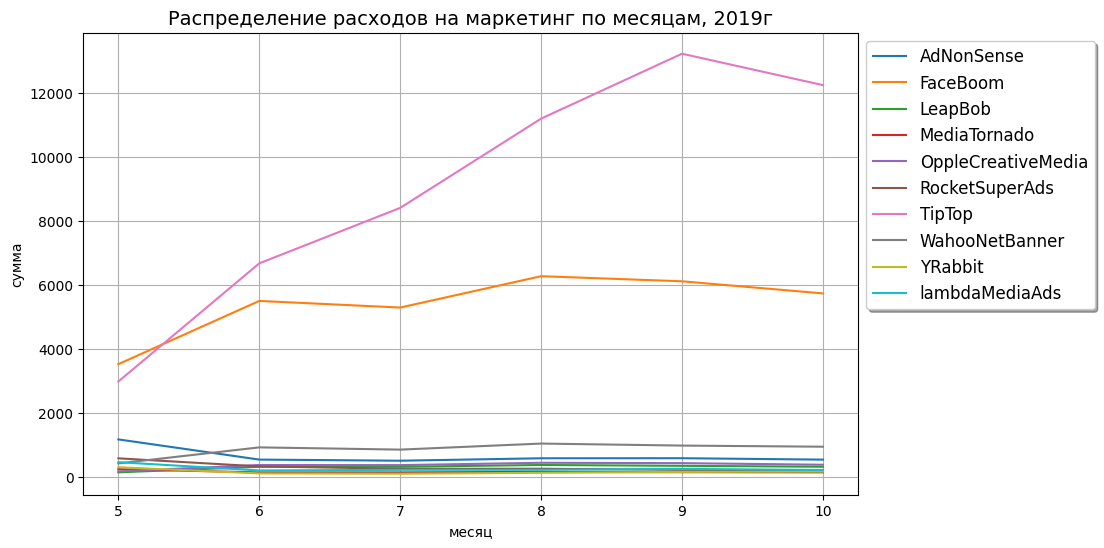

In [31]:
# постороим график динамики изменения расходов по месяцам
(
   costs
    .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .round()
    .plot(figsize=(10,6), 
          grid=True) 
)
plt.title("Распределение расходов на маркетинг по месяцам, 2019г", fontsize=14)
plt.ylabel('сумма')
plt.xlabel('месяц')
plt.legend(fontsize=12, shadow=True, bbox_to_anchor=(1.0, 1.0))
plt.show()

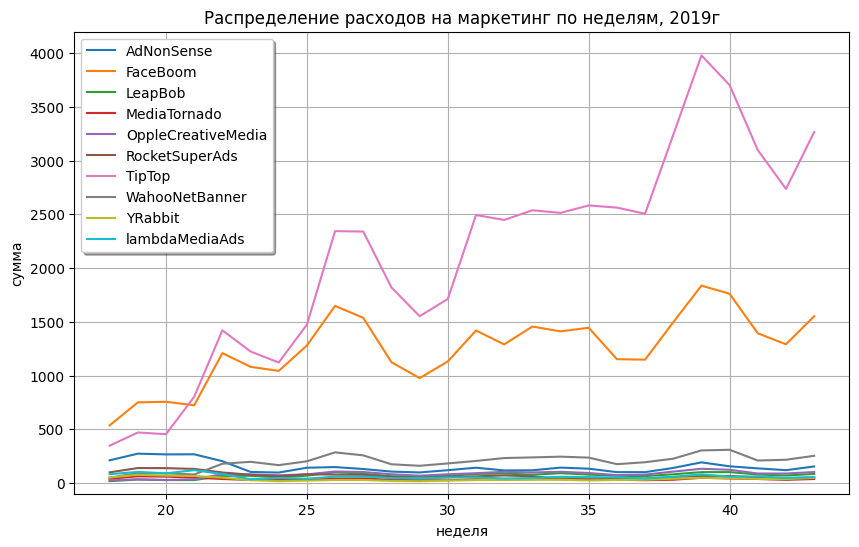

In [32]:
# постороим график динамики изменения расходов по неделям
(
    costs
    .pivot_table(index='week', columns = 'channel', values='costs', aggfunc='sum')
    .round()
    .plot(figsize=(10,6), 
          grid=True) 
)
plt.title("Распределение расходов на маркетинг по неделям, 2019г", fontsize=12)
plt.ylabel('сумма')
plt.xlabel('неделя')
plt.ylim(-100, 4200)
plt.legend(fontsize=10, shadow=True)
plt.show()

In [33]:
# посмотрим на среднюю стоимость привлечения одного пользователя из каждого источника
(
    profiles.groupby('channel', as_index=False)
    .agg({'acquisition_cost' : 'mean'})
    .rename(columns={'acquisition_cost' : 'CAC'})
    .round(2)
    .sort_values(by='CAC', ascending=False)
)

channel   CAC
6               TipTop  2.80
1             FaceBoom  1.11
0           AdNonSense  1.01
9       lambdaMediaAds  0.72
7       WahooNetBanner  0.60
5       RocketSuperAds  0.41
4   OppleCreativeMedia  0.25
3         MediaTornado  0.22
8              YRabbit  0.22
2              LeapBob  0.21
10             organic  0.00

In [34]:
# посчитаем средний САС по всему проекту
print('Среднее значение САС для всех пользователей: ', profiles['acquisition_cost'].mean().round(2))

Среднее значение САС для всех пользователей:  0.7


Получается, что для TipTop, FaceBoom, AdNonSense показатели САС значительно выше средних показателей САС по всему проекту

In [35]:
# для дальнейшего исследования исключим пользователей, пришедших самостоятельно
profiles = profiles[profiles['channel'] != 'organic']

In [36]:
# посмотрим на средний САС только для пользователей, пришедших из рекламных каналов
print('Среднее значение САС для пользователей из рекламных каналов:', profiles['acquisition_cost'].mean().round(2))

Среднее значение САС для пользователей из рекламных каналов: 1.13


**Вывод**   
Расходы на маркетинг за данный период составили 105497. Самыми затратными источниками являются TipTop (54751) и FaceBoom (32445), на их долю приходится 83 % от всех затрат на рекламу.  У источника TipTop наблюдается значительное увеличение расходов от месяца к месяцу. Средняя стоимость привлечения пользователя канала TipTop за весь период составляет - 2.8, у канала FaceBoom - 1.1
Стоит посмотреть на целесообразность увеличения и так высоких затрат рекламного канала TipTop

## Оцениваем окупаемость рекламы
<a id="roi"></a>


In [37]:
# задаем момент анализа - 1 ноября 2019г
observation_date = datetime(2019, 11, 1).date()

# задаем горизонт анализа 
horizon_days = 14  

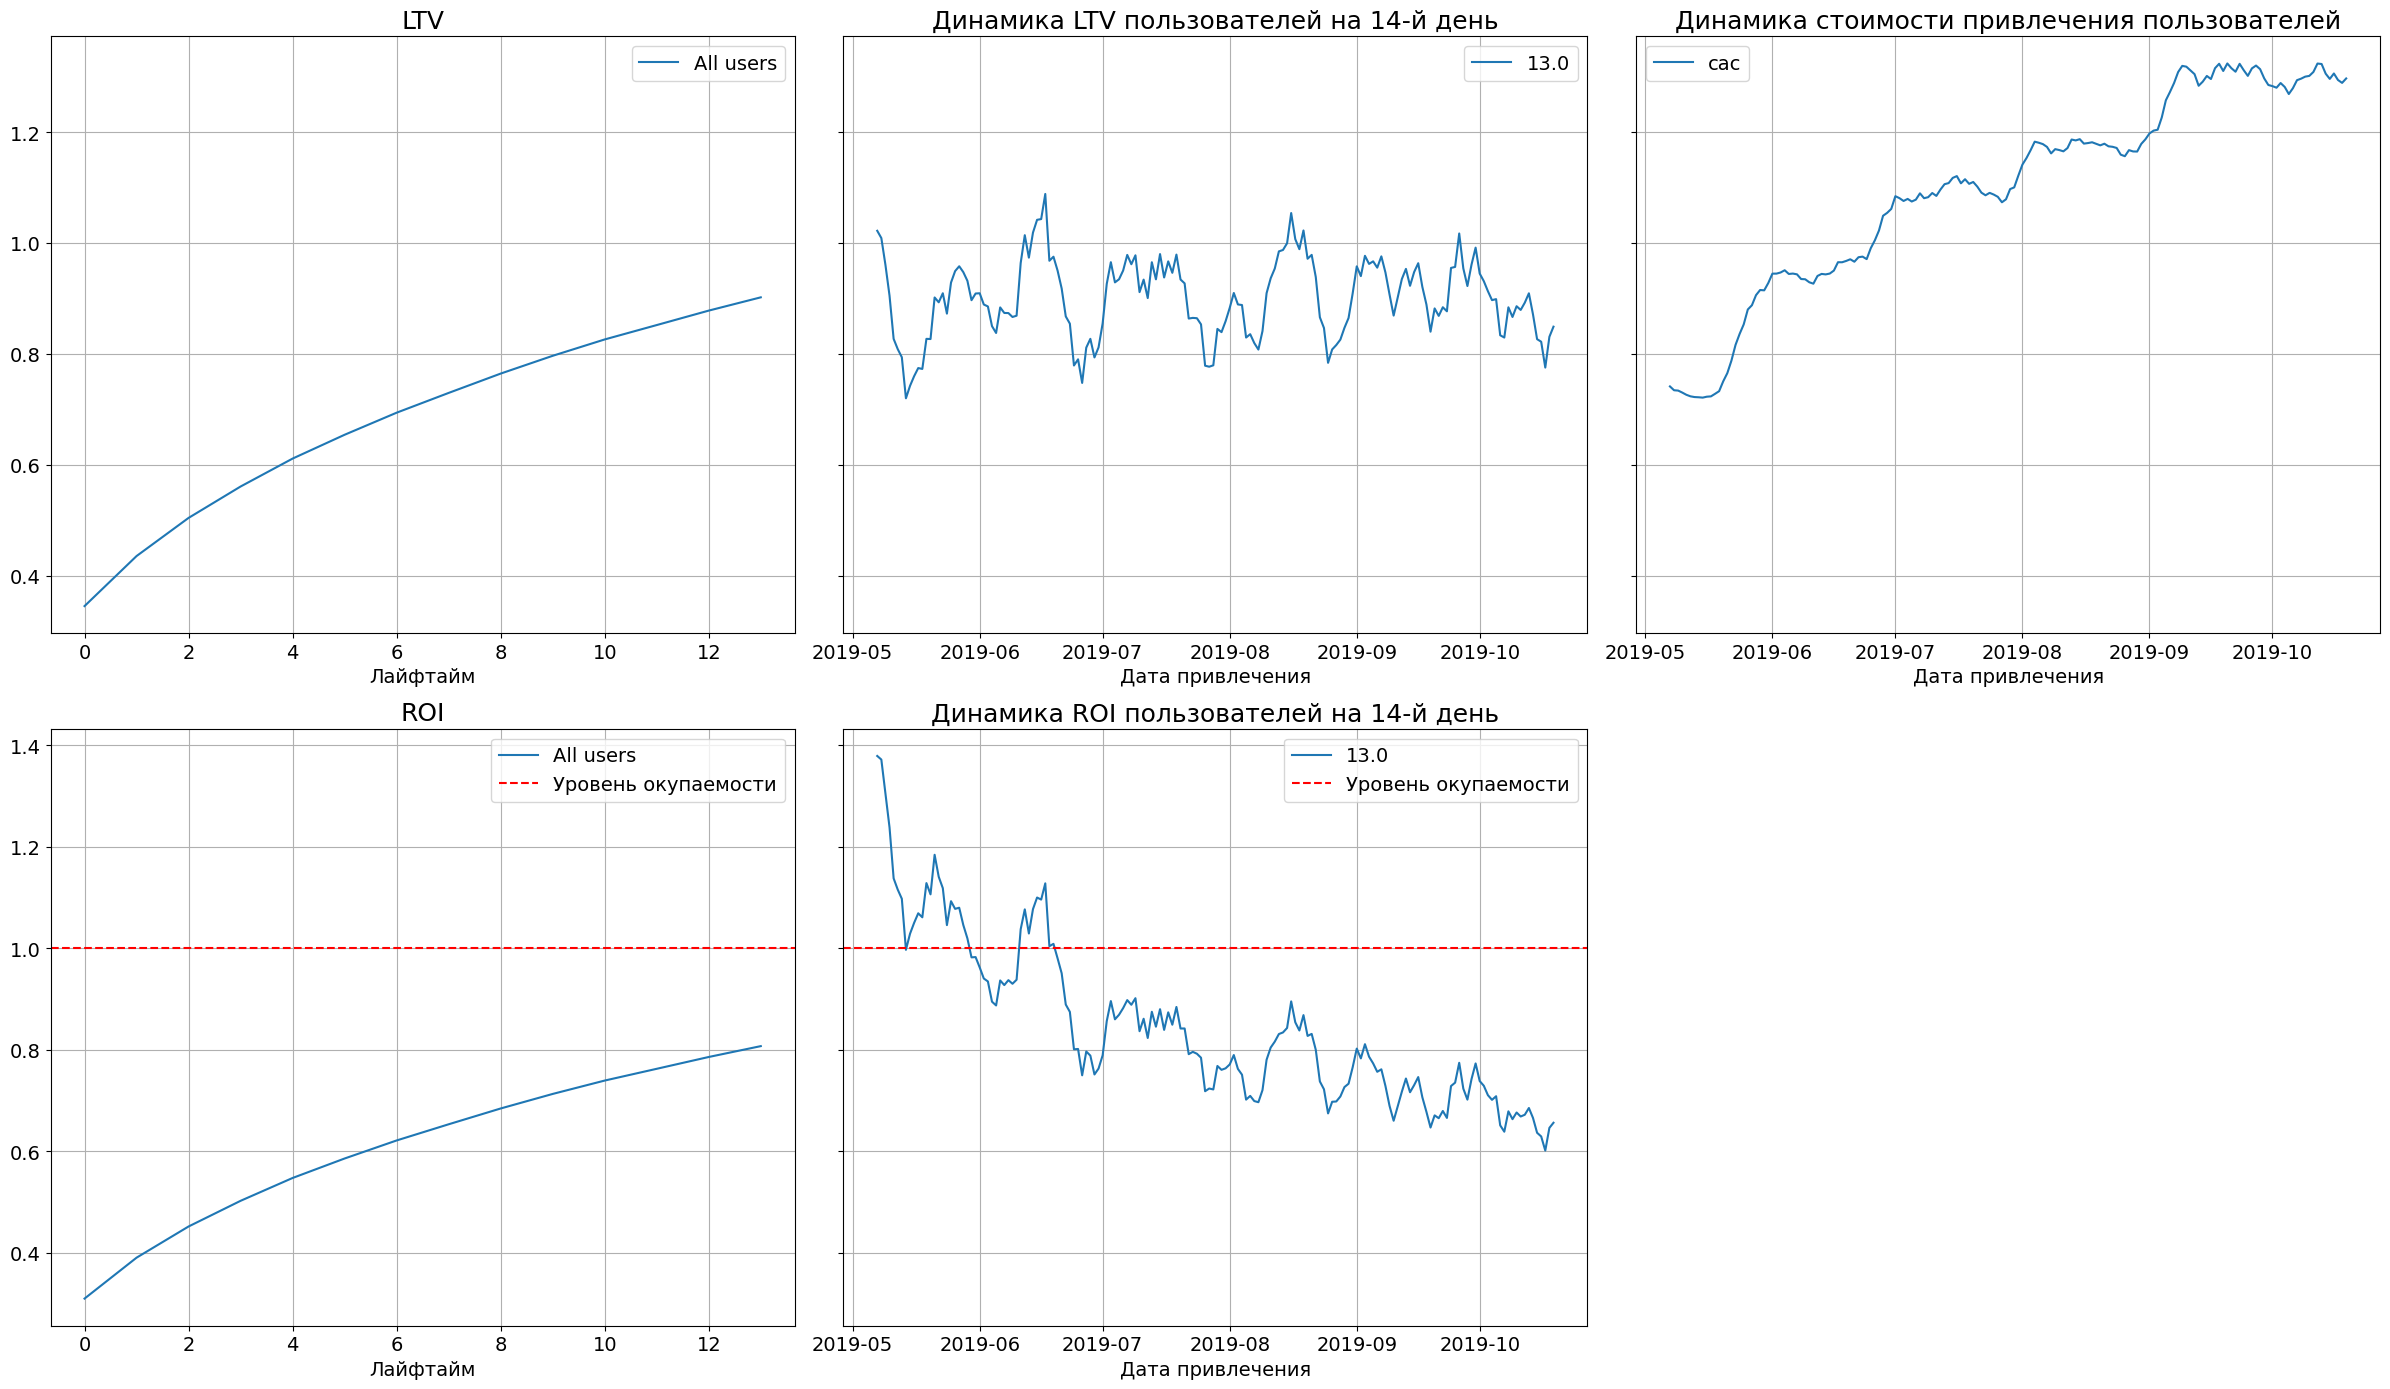

In [38]:
# считаем LTV и ROI, вызовем функцию get_ltv
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# проанализируем окупаемость рекламы, вызовем функцию plot_ltv_roi 
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- кривая LTV увеличивается
- реклама не окупается
- по графику динамики ROI заметна отрицательная динамика, если в мае ROI превышал уровень окупаемости, то с середины июня ROI уже стабильно ниже уровня окупаемости
- САС с каждым месяцем увеличивается, скорее всего за счет увеличения затрат на канал TipTop

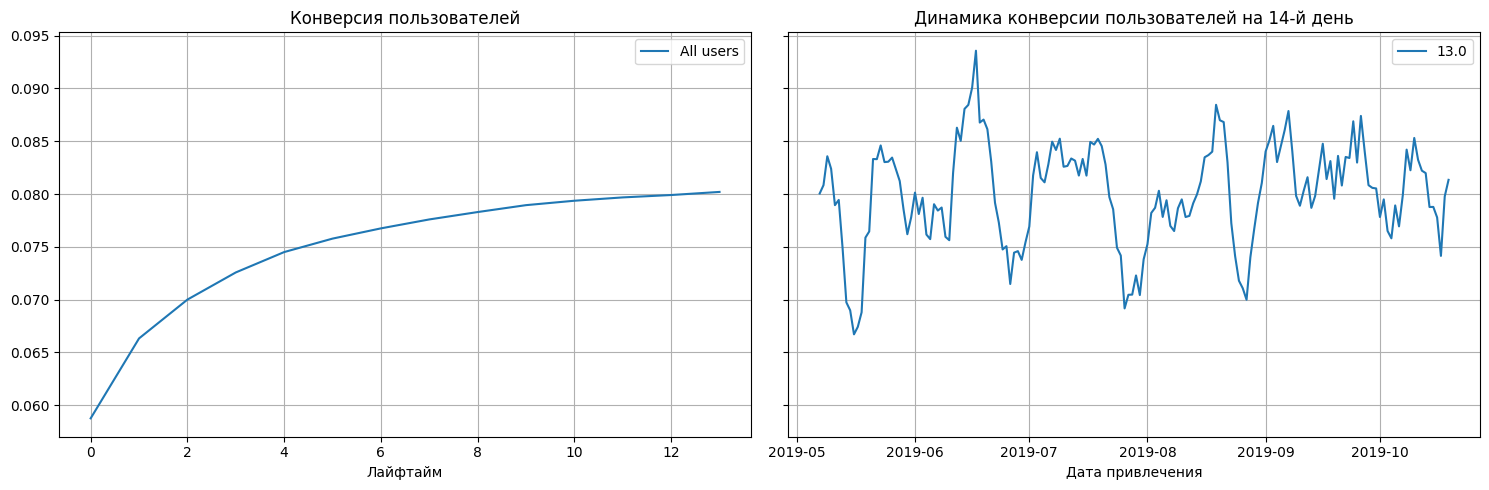

In [39]:
# посчитаем конверсию пользователей, вызовем функцию get_conversion
conversion, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days
    )
# посмотрим на графики конверсии пользователей, вызовем функцию plot_conversion
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Кривая конверсии планомерно растет, отклонений нет

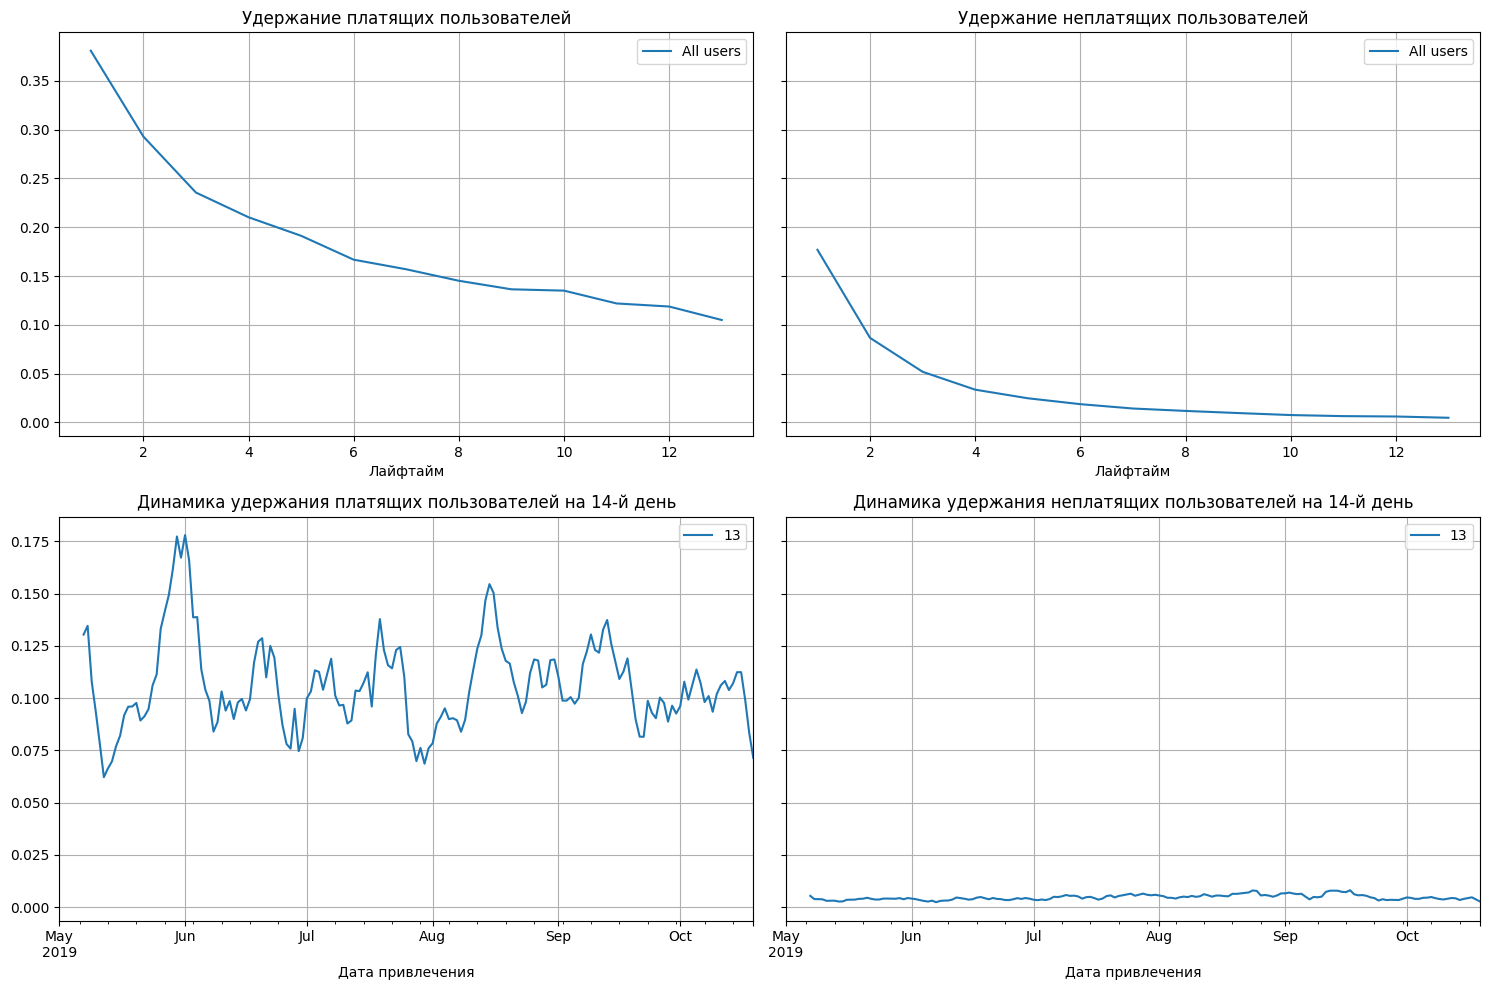

In [40]:
# посчитаем удержание пользователей, вызовем функцию get_retention
retention, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days
)
# посмотрим на графики удержания пользователей, вызовем функцию plot_retention
plot_retention(retention_grouped, retention_history, horizon_days)

- кривая удержания пользователей снижается 
- показания у платящих пользователей выше, чем у неплатящих
- удержание платящих пользователей в мае было выше, чем в октябре

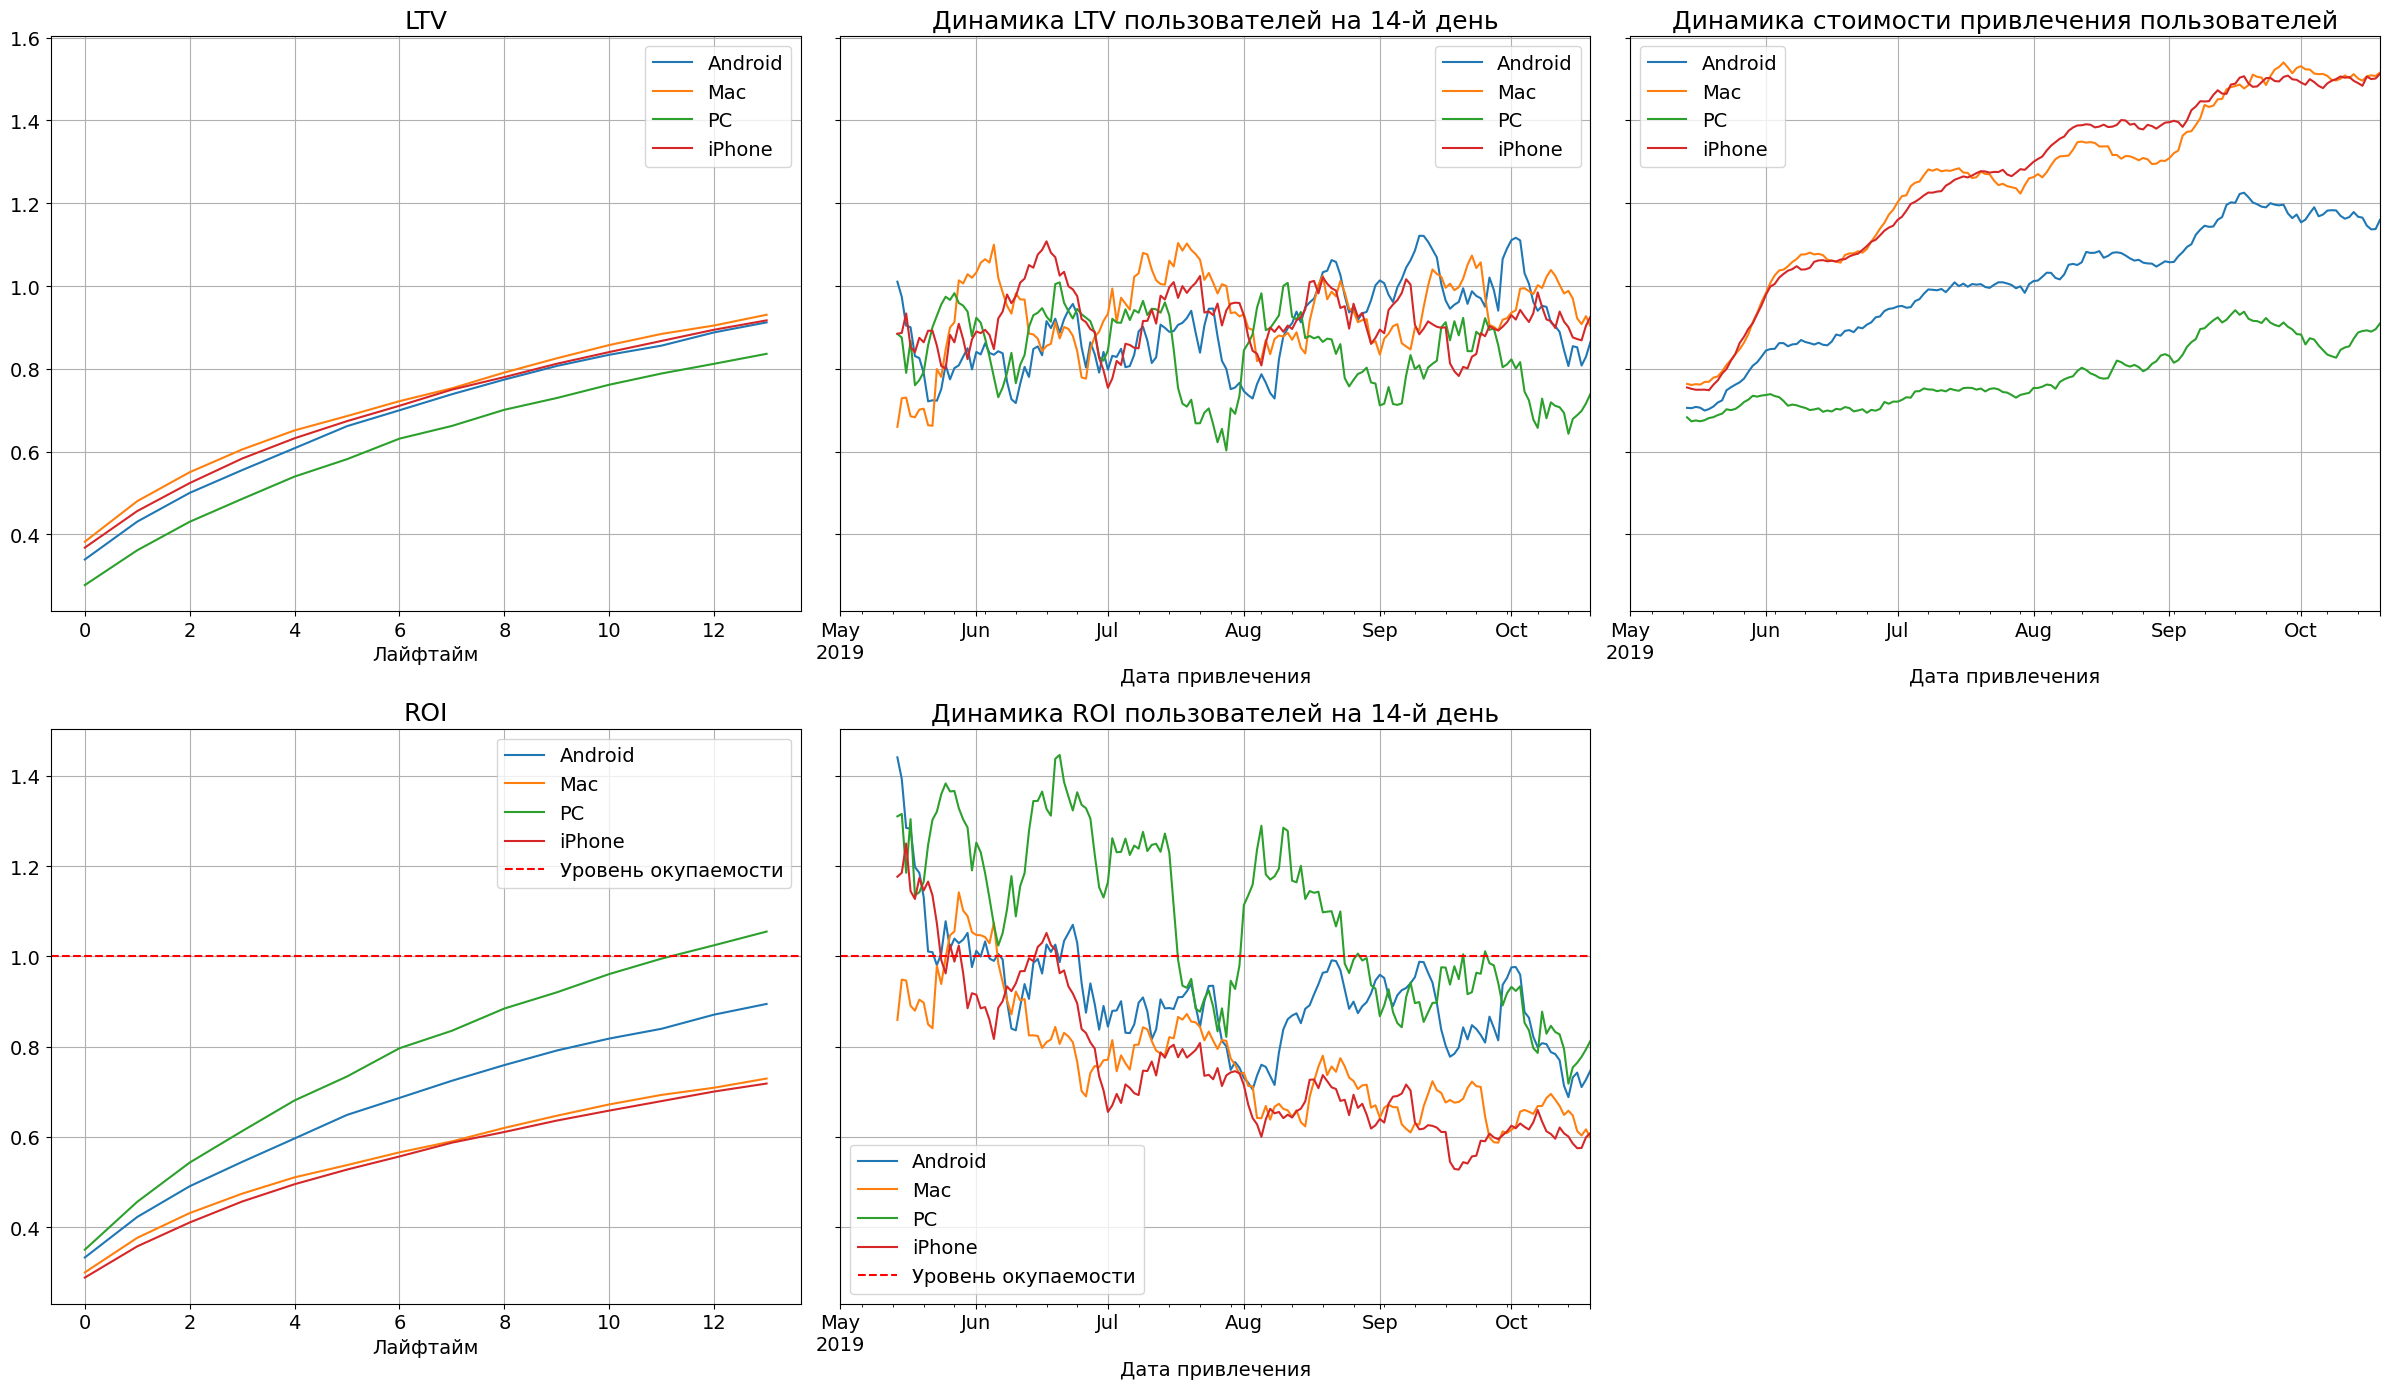

In [41]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- показатели ROI у пользователей с типами устройств PC выше уровня окупаемости, остальные не окупаются
- у MAC и iphone показатель ROI одинаковый и меньше уровня окупаемости
- наблюдается снижение ROI для пользователей всех устройств
- с сентября пользователи PC также не окупаются
- САС увеличился для пользователей всех устройств
- стоимость привлечения пользователей с девайсами MAC и iphone выше



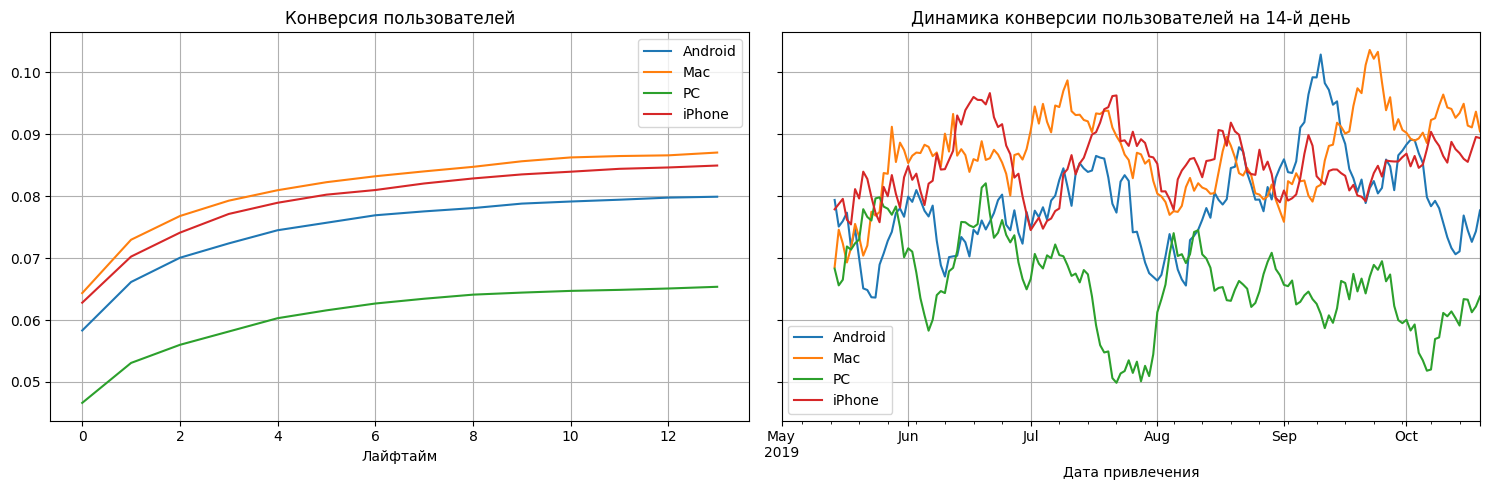

In [42]:
# смотрим конверсию с разбивкой по устройствам
conversion, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days, 
    dimensions=dimensions
    )
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

- у пользователи с устройтвами MAC, iphone выше конверсия
- значительно ниже у PC

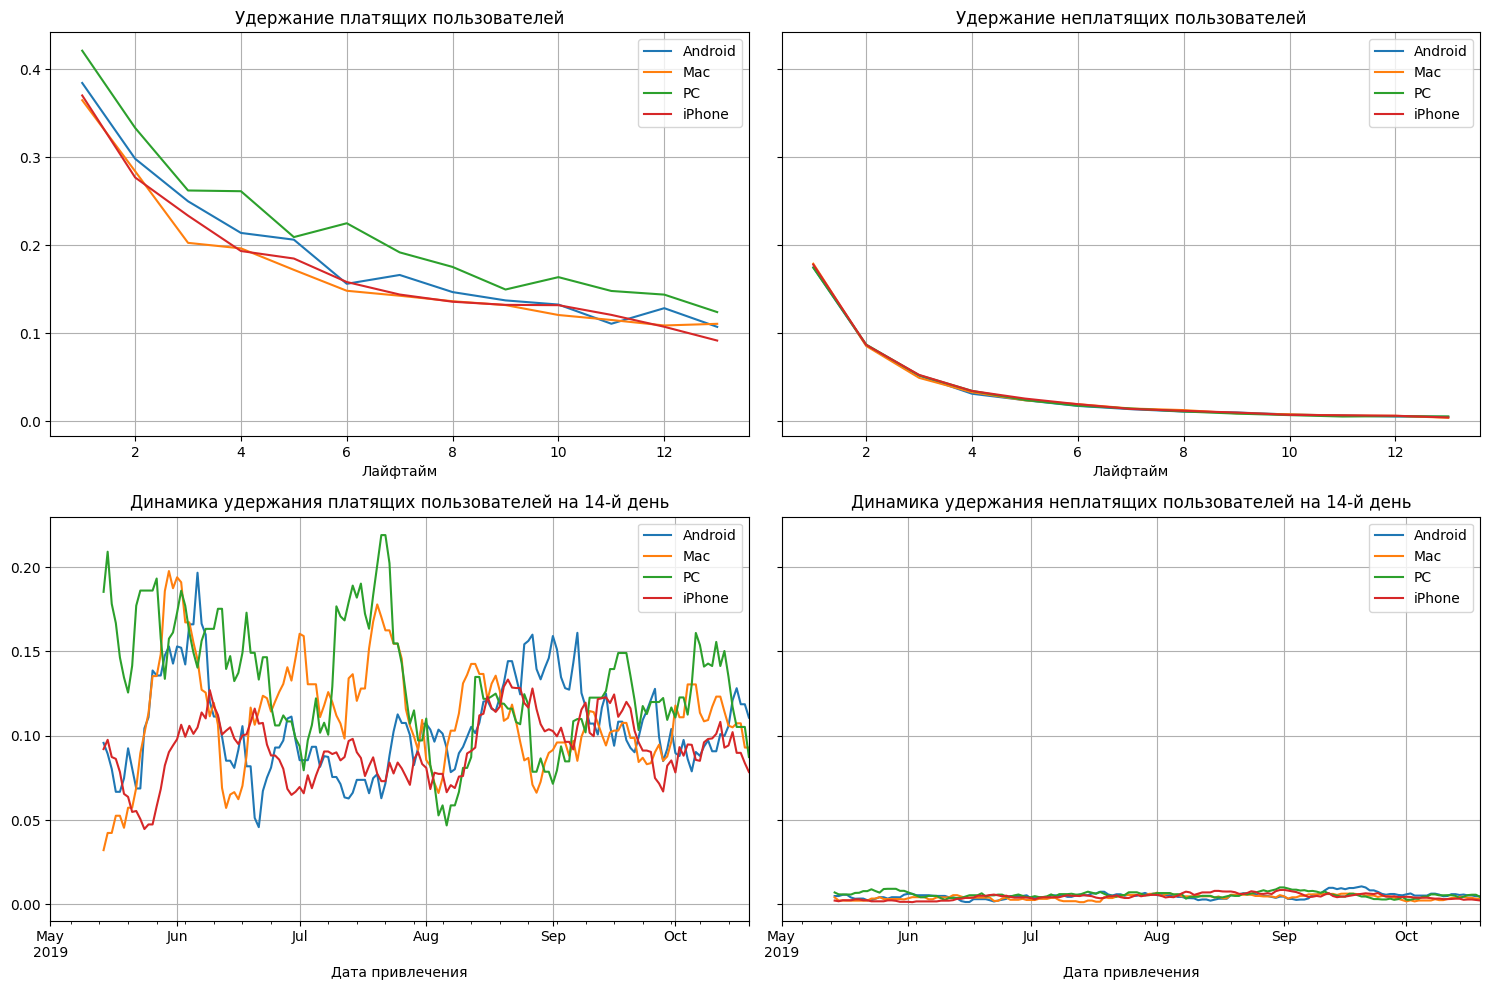

In [43]:
# посмотрим на  удержание пользователей по устройствам
retention, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
     dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

удержание платящих пользователей с устройтвами MAC, iphone незначительно ниже, чем у PC

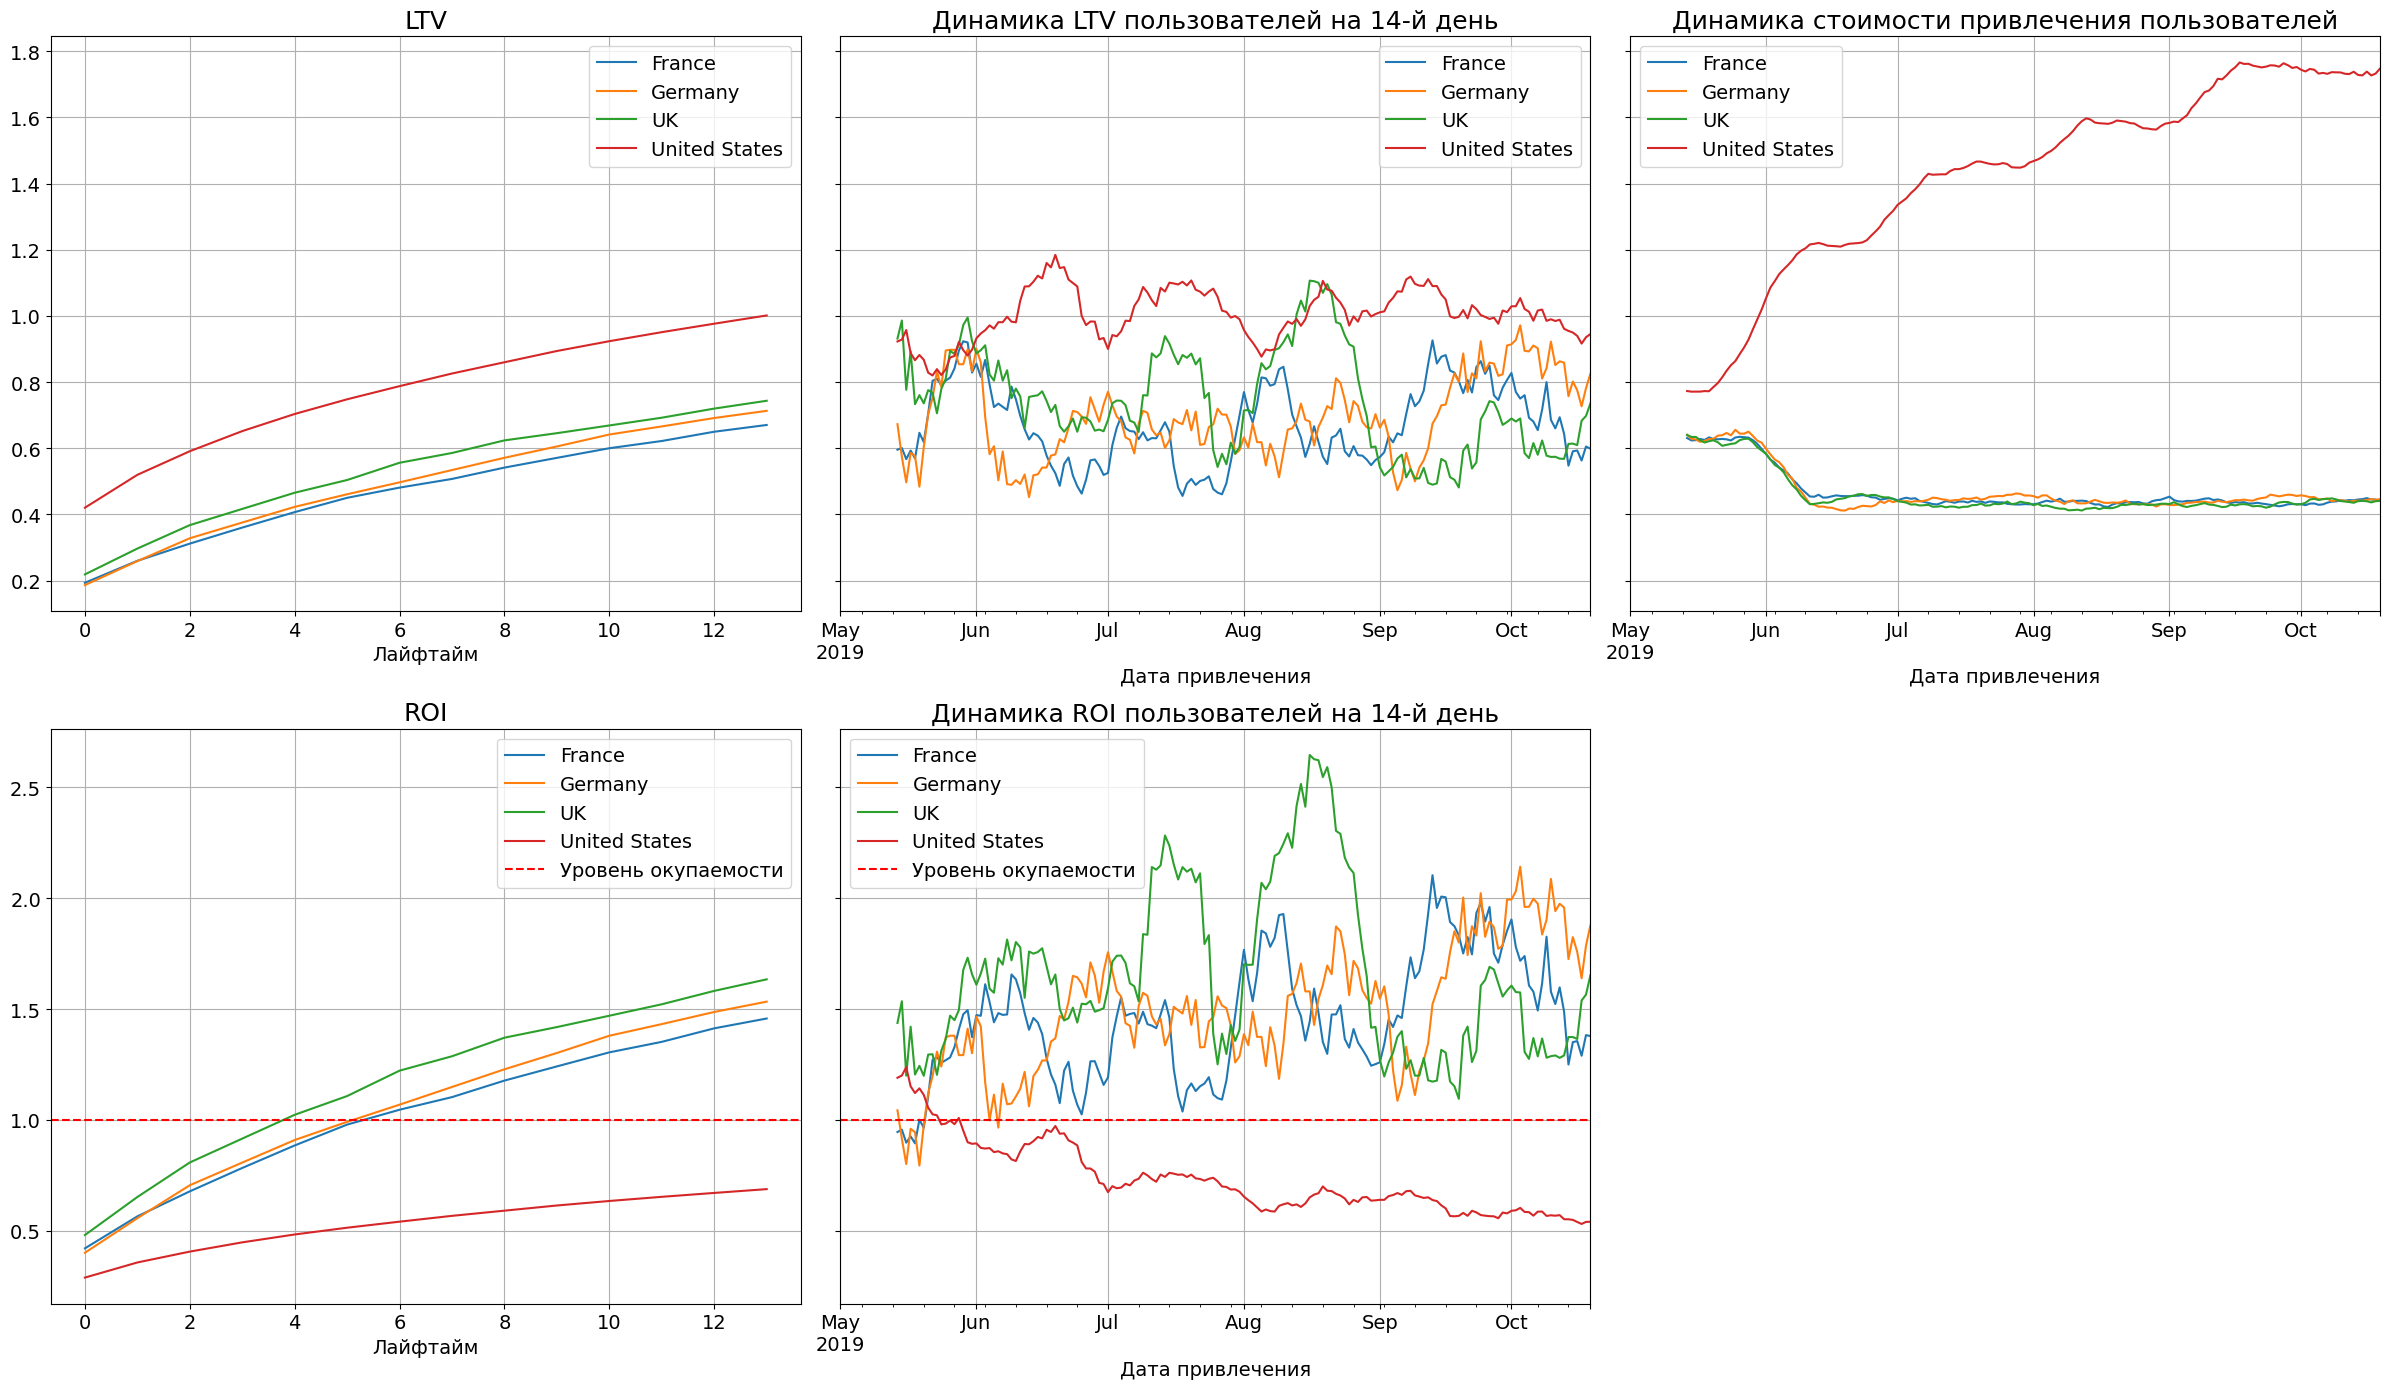

In [44]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- по графикам видно, что показатели у пользователей из Европы (Великобритании, Германии и Франции) и США имеют явные различия
- LTV пользователей из США выше
- показатели ROI  у пользователей из Великобритании, Германии и Франции выше уровня окупаемости, а вот пользователи из США не окупаются
- максимальные показатели ROI на 14 день у пользователей из Великобритании, выше уровня окупаемости в 2 раза
- в динамике видно, что ROI у когорт из США с конца июня стабильно ниже уровня окупаемости и имеют тенденцию к снижению
- у европейских стран показатели ROI стабильны, единственно, что с сентября лучшие показатели у Германии  
- САС для пользователей из Европы стабилен и невысокий
- стоимость привлечения пользователей из США значительно выше и виден рост, это может быть причиной не окупаемости



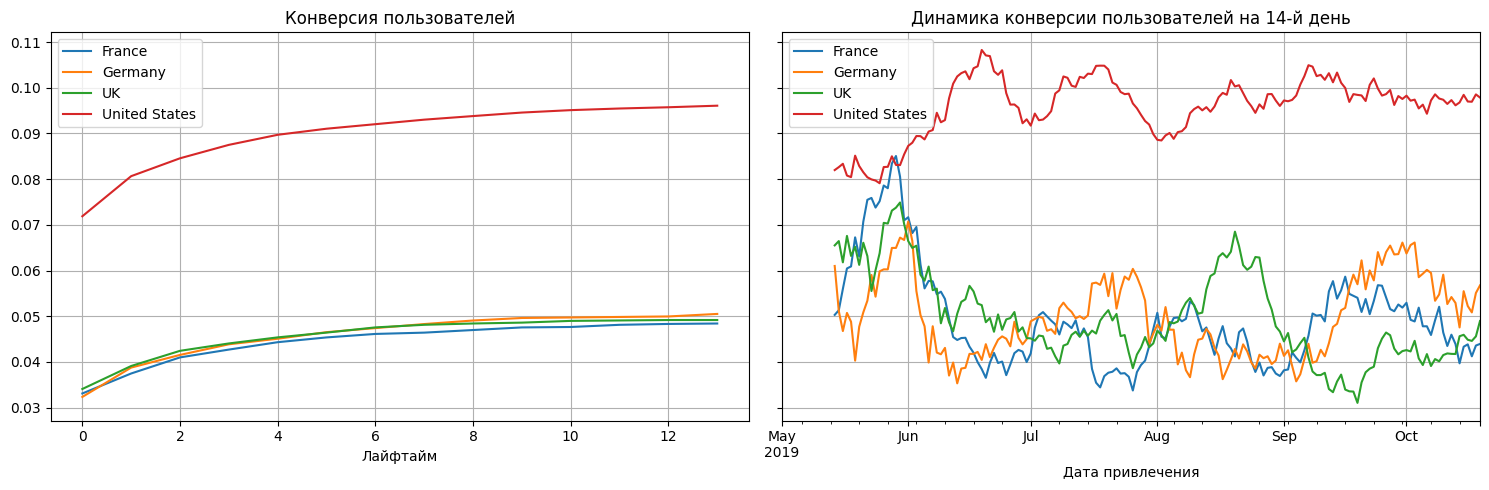

In [45]:
# смотрим на конверсию  с разбивкой по странам

conversion, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days, dimensions=dimensions
    )
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

конверсия у пользоватей из США в 2 раза выше, чем у пользователей из Великобритании, Германии и Франции

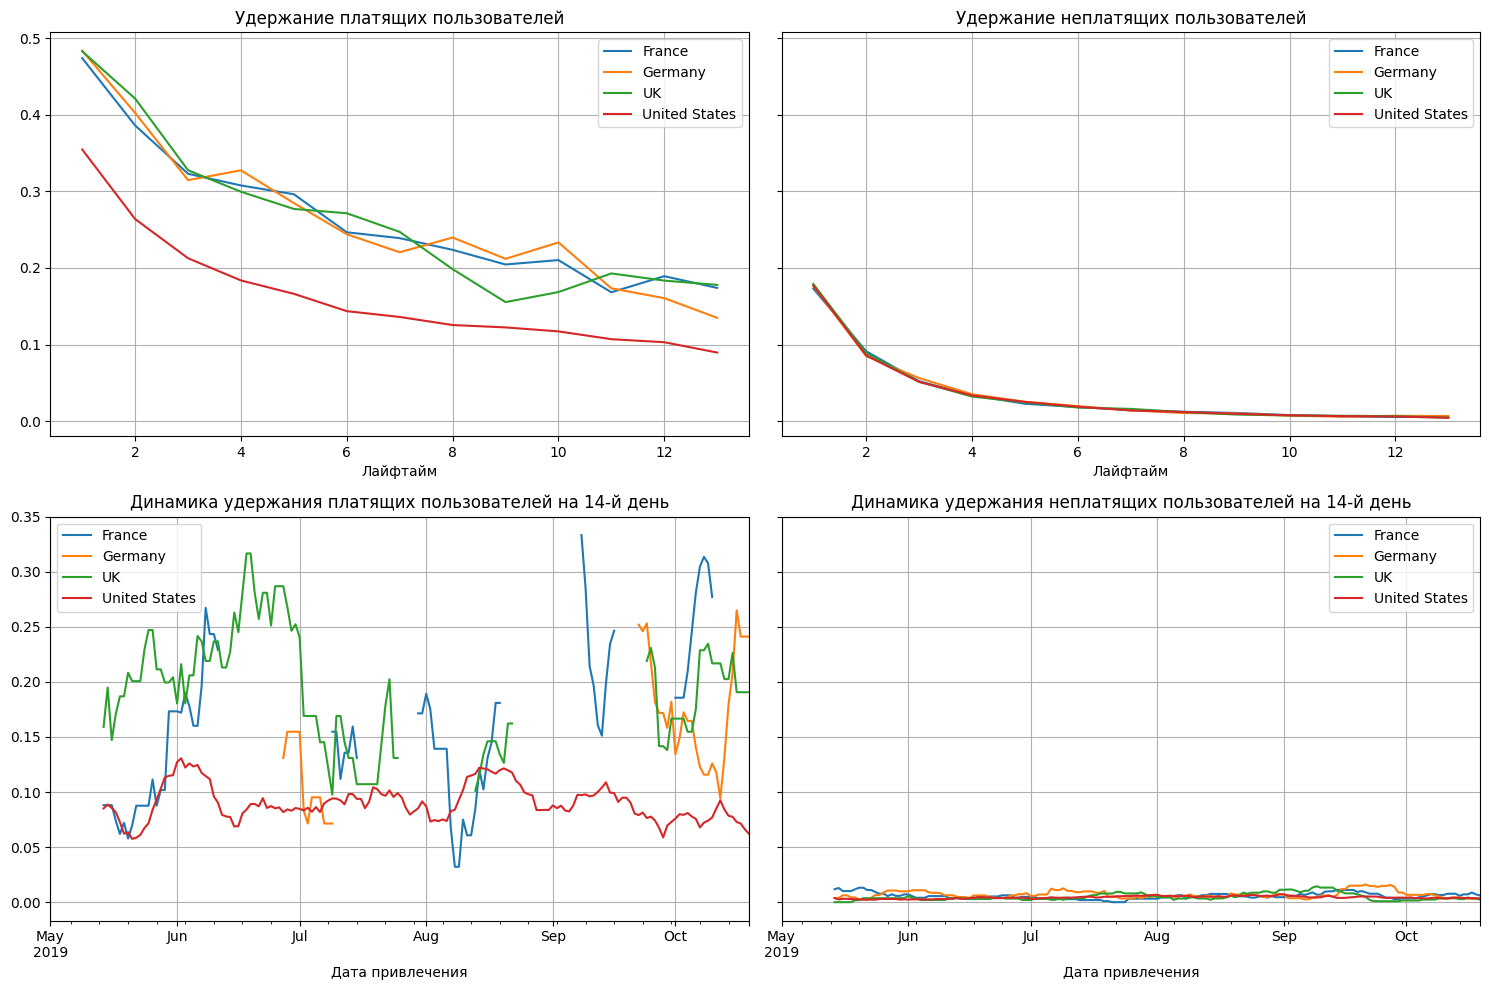

In [46]:
# посмотрим на  удержание пользователей по странам
retention, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
     dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

а вот удержание пользователей из США ниже

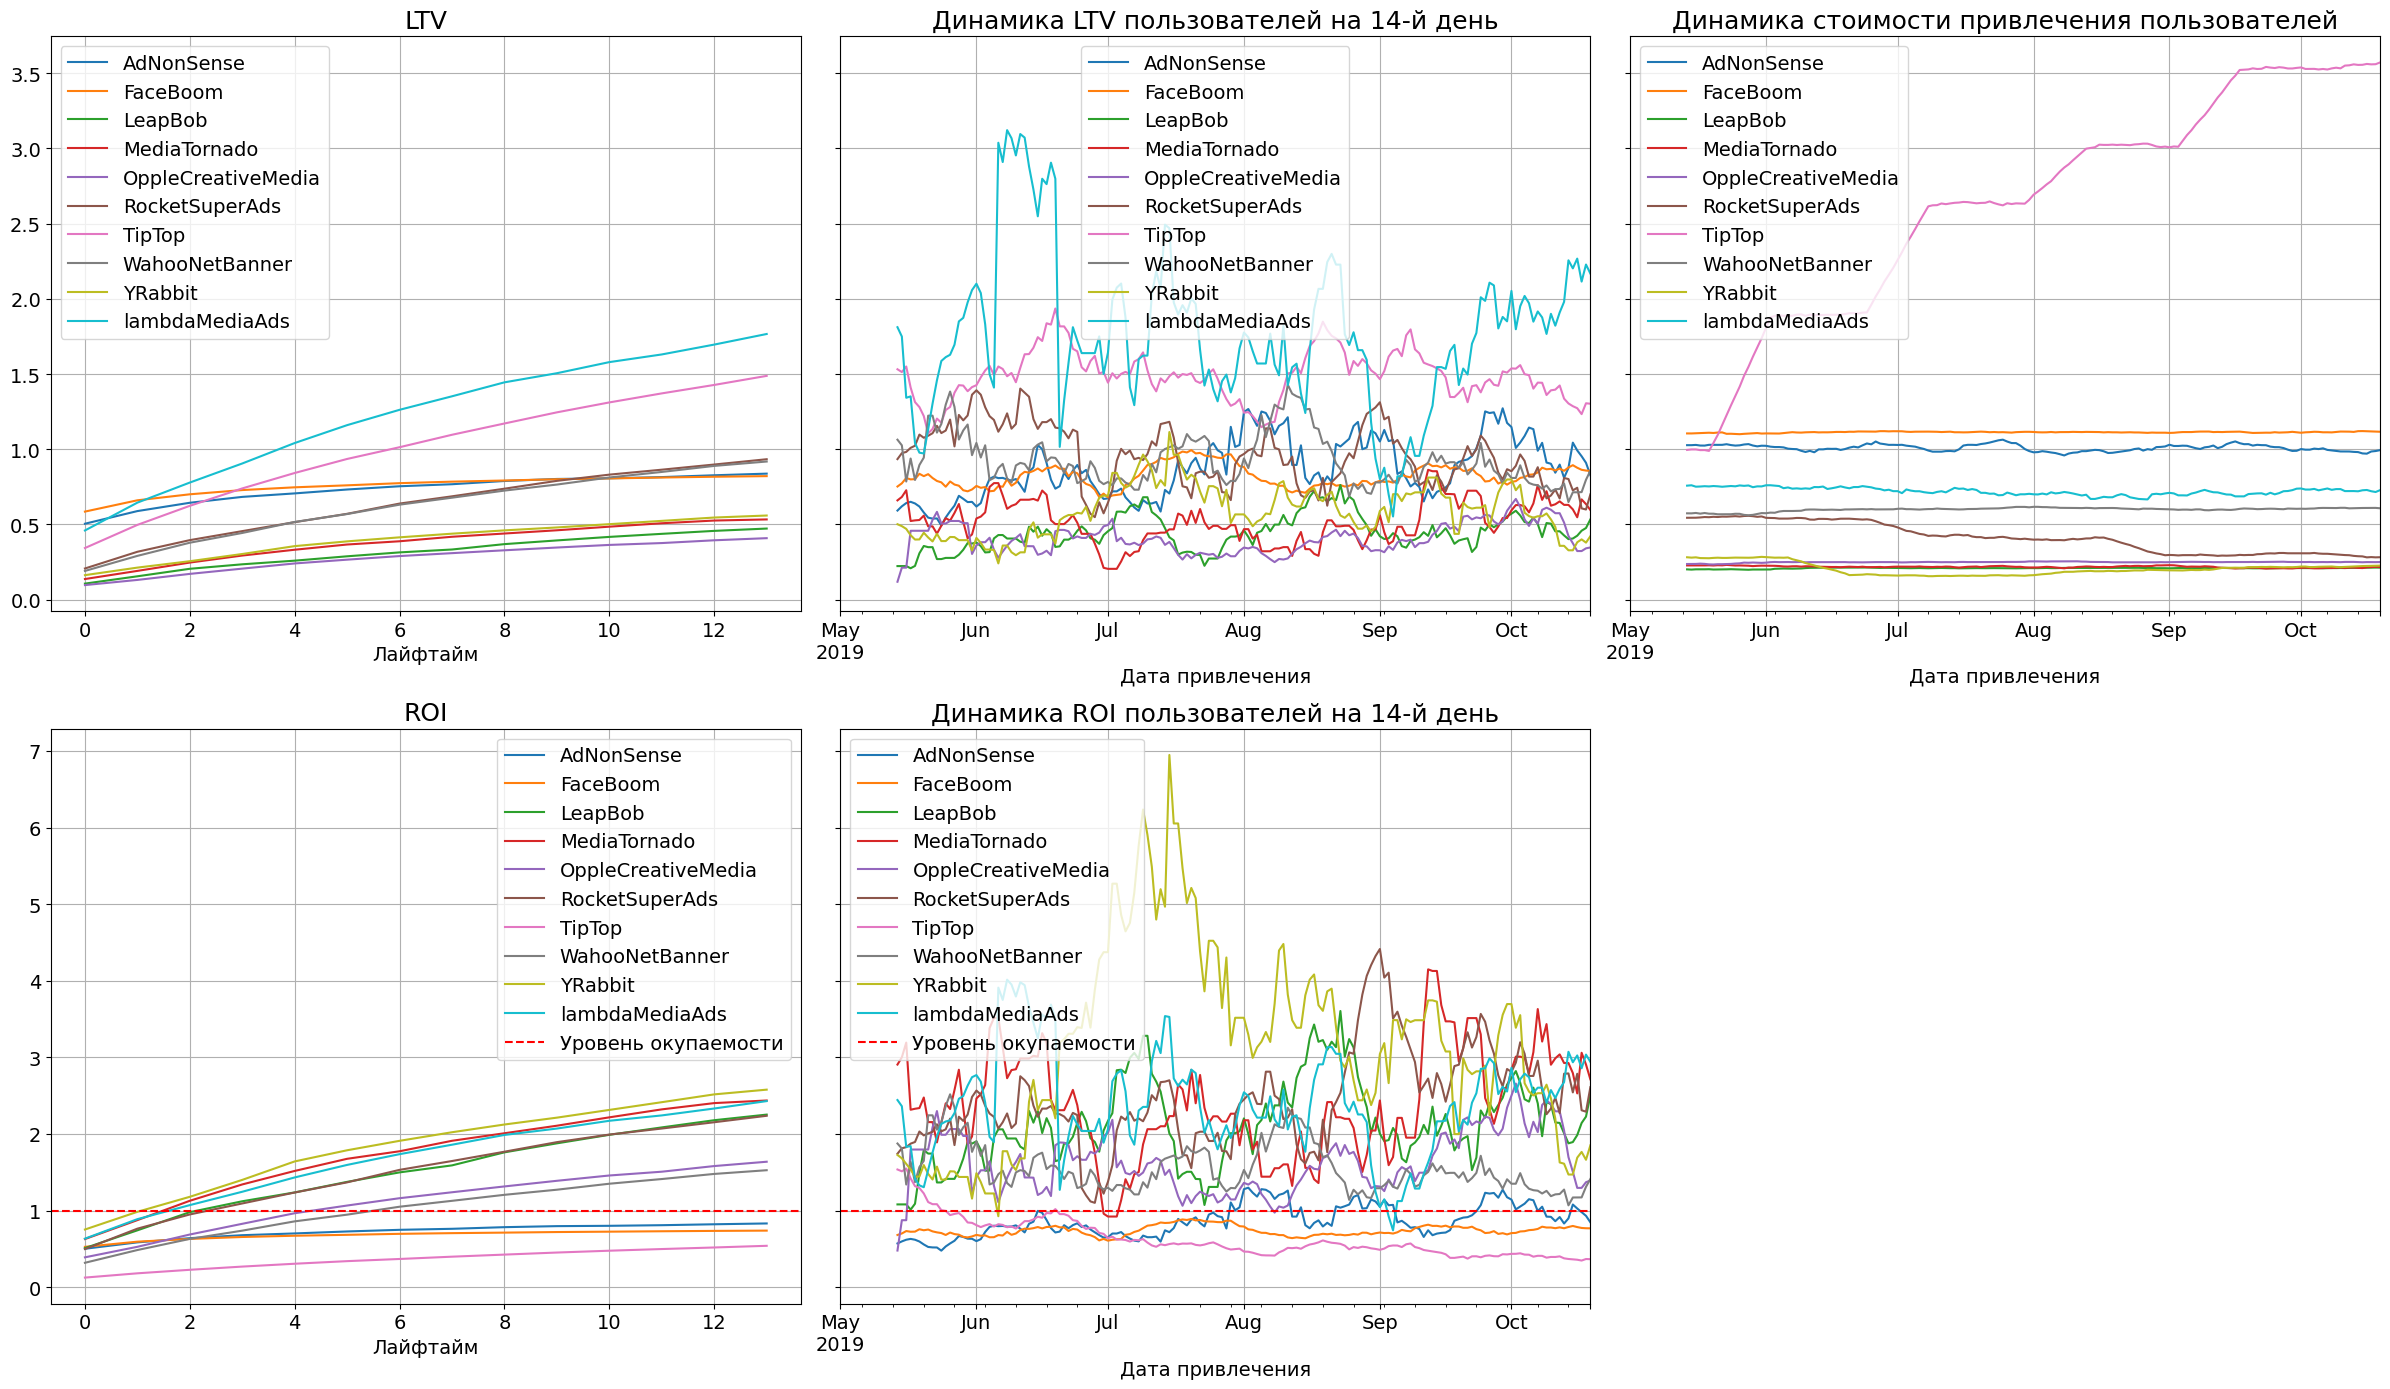

In [47]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14 
) 

- большинство рекламных каналов окупаются
- лучше всего окупаются пользователи, пришедшие по каналу YRabbit(США), при минимальных значениях САС, ROI 14-го дня в 2,5 раза выше окупаемости. В летние месяцы виден значительный подьем ROI для этого канала, в июле показатели достигали 7
- 3 канала имеют ROI ниже уровня окупаемости - это каналы TipTop, FaceBoom (США) и  AdNonSense (Великобритания, Франция, Германия)
- САС для привлечения пользователей по каналу TipTop в разы выше, еще и увеличивается, но с увеличением САС мы не наблюдаем  рост LTV и ROI 



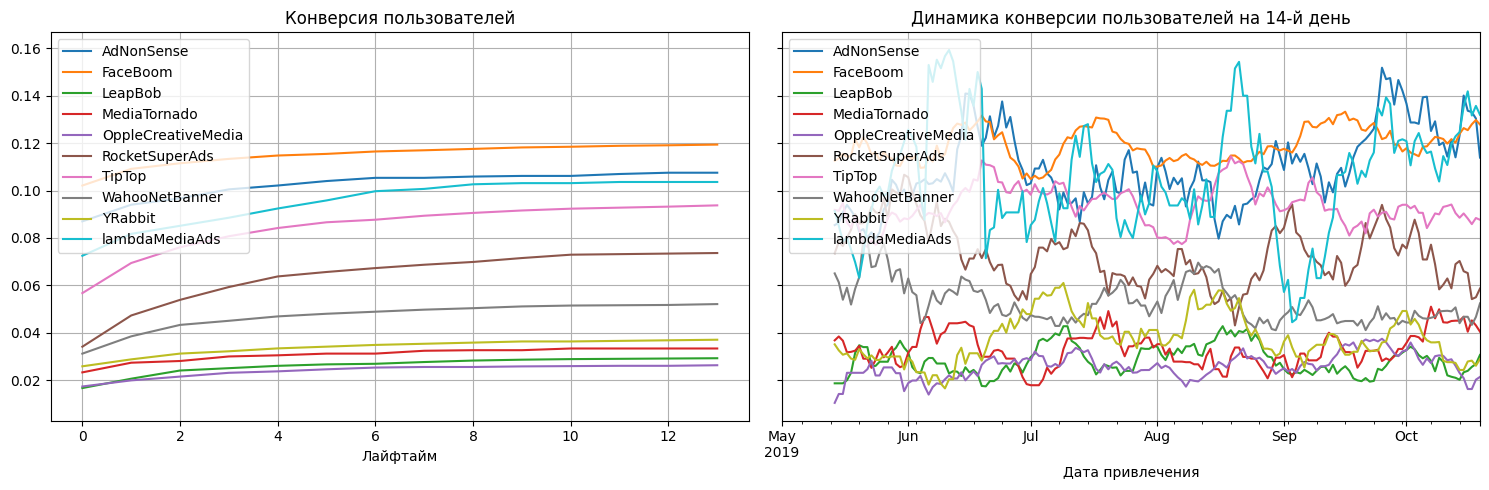

In [48]:
# смотрим на конверсию с разбивкой по рекламным каналам

conversion, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days, dimensions=dimensions
    )
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Все 3 неокупаемых рекламных канала показывают наилучшую конверсию

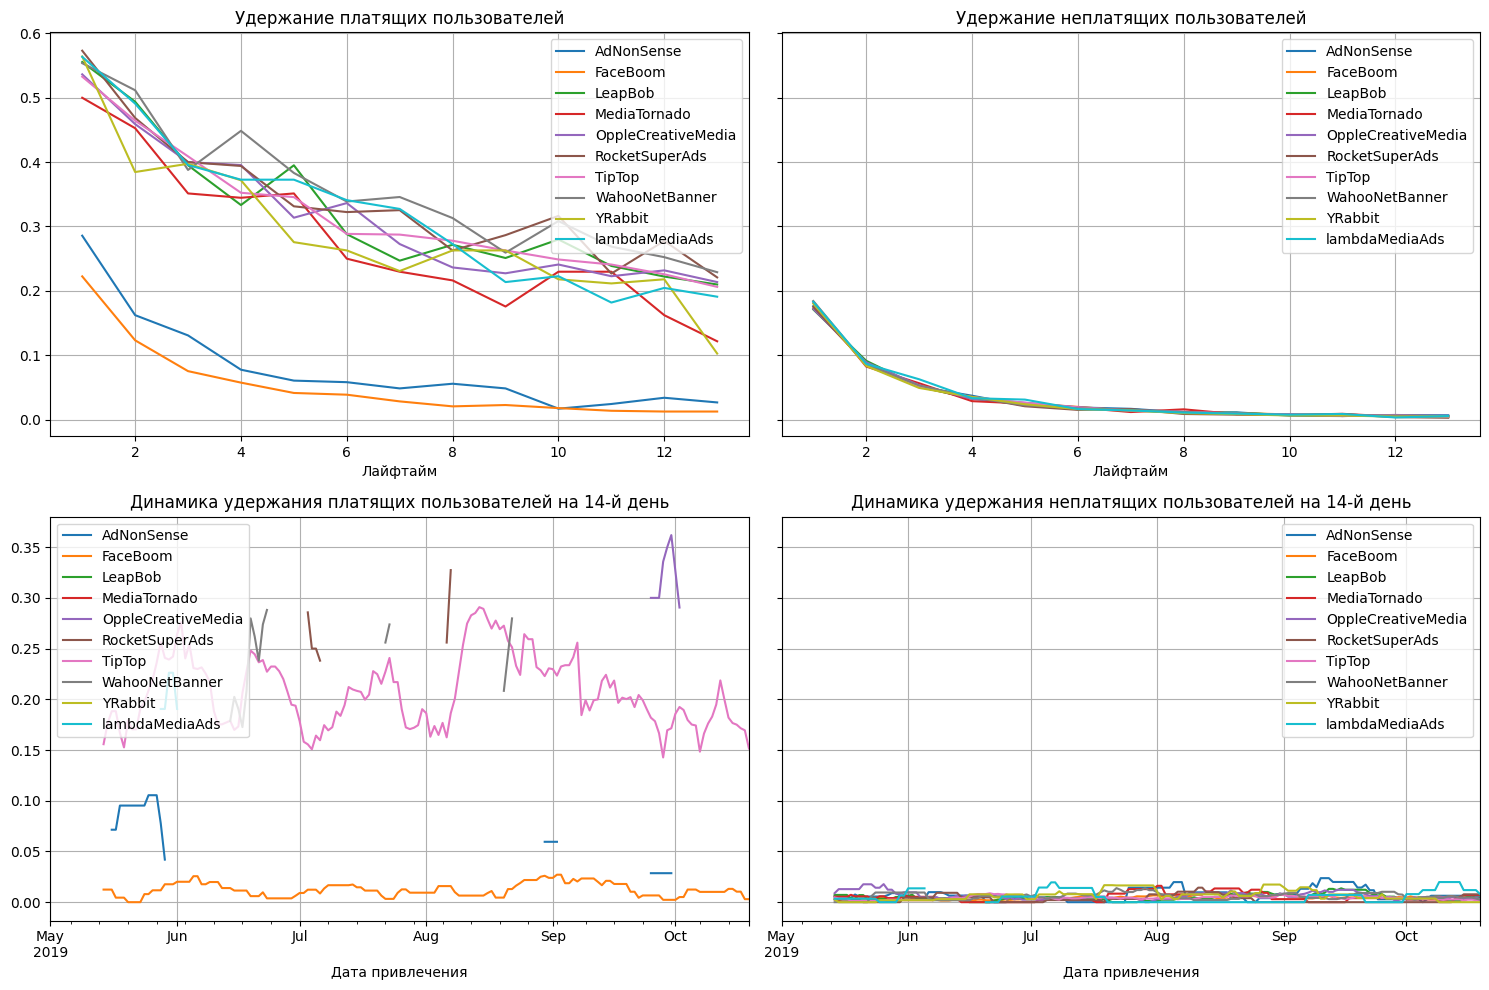

In [49]:
# посмотрим на  удержание пользователей по рекламным каналам
retention, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
     dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

удержание платящих пользователей из канала FaceBoom и AdNonSense значительно ниже, чем у других каналов


In [50]:
# объединим Великобритинию, Францию и Германию в общее название Europe
profiles_new = profiles.copy()
profiles_new['region'] = profiles_new['region'].replace(['UK', 'France', 'Germany'], 'Europe')

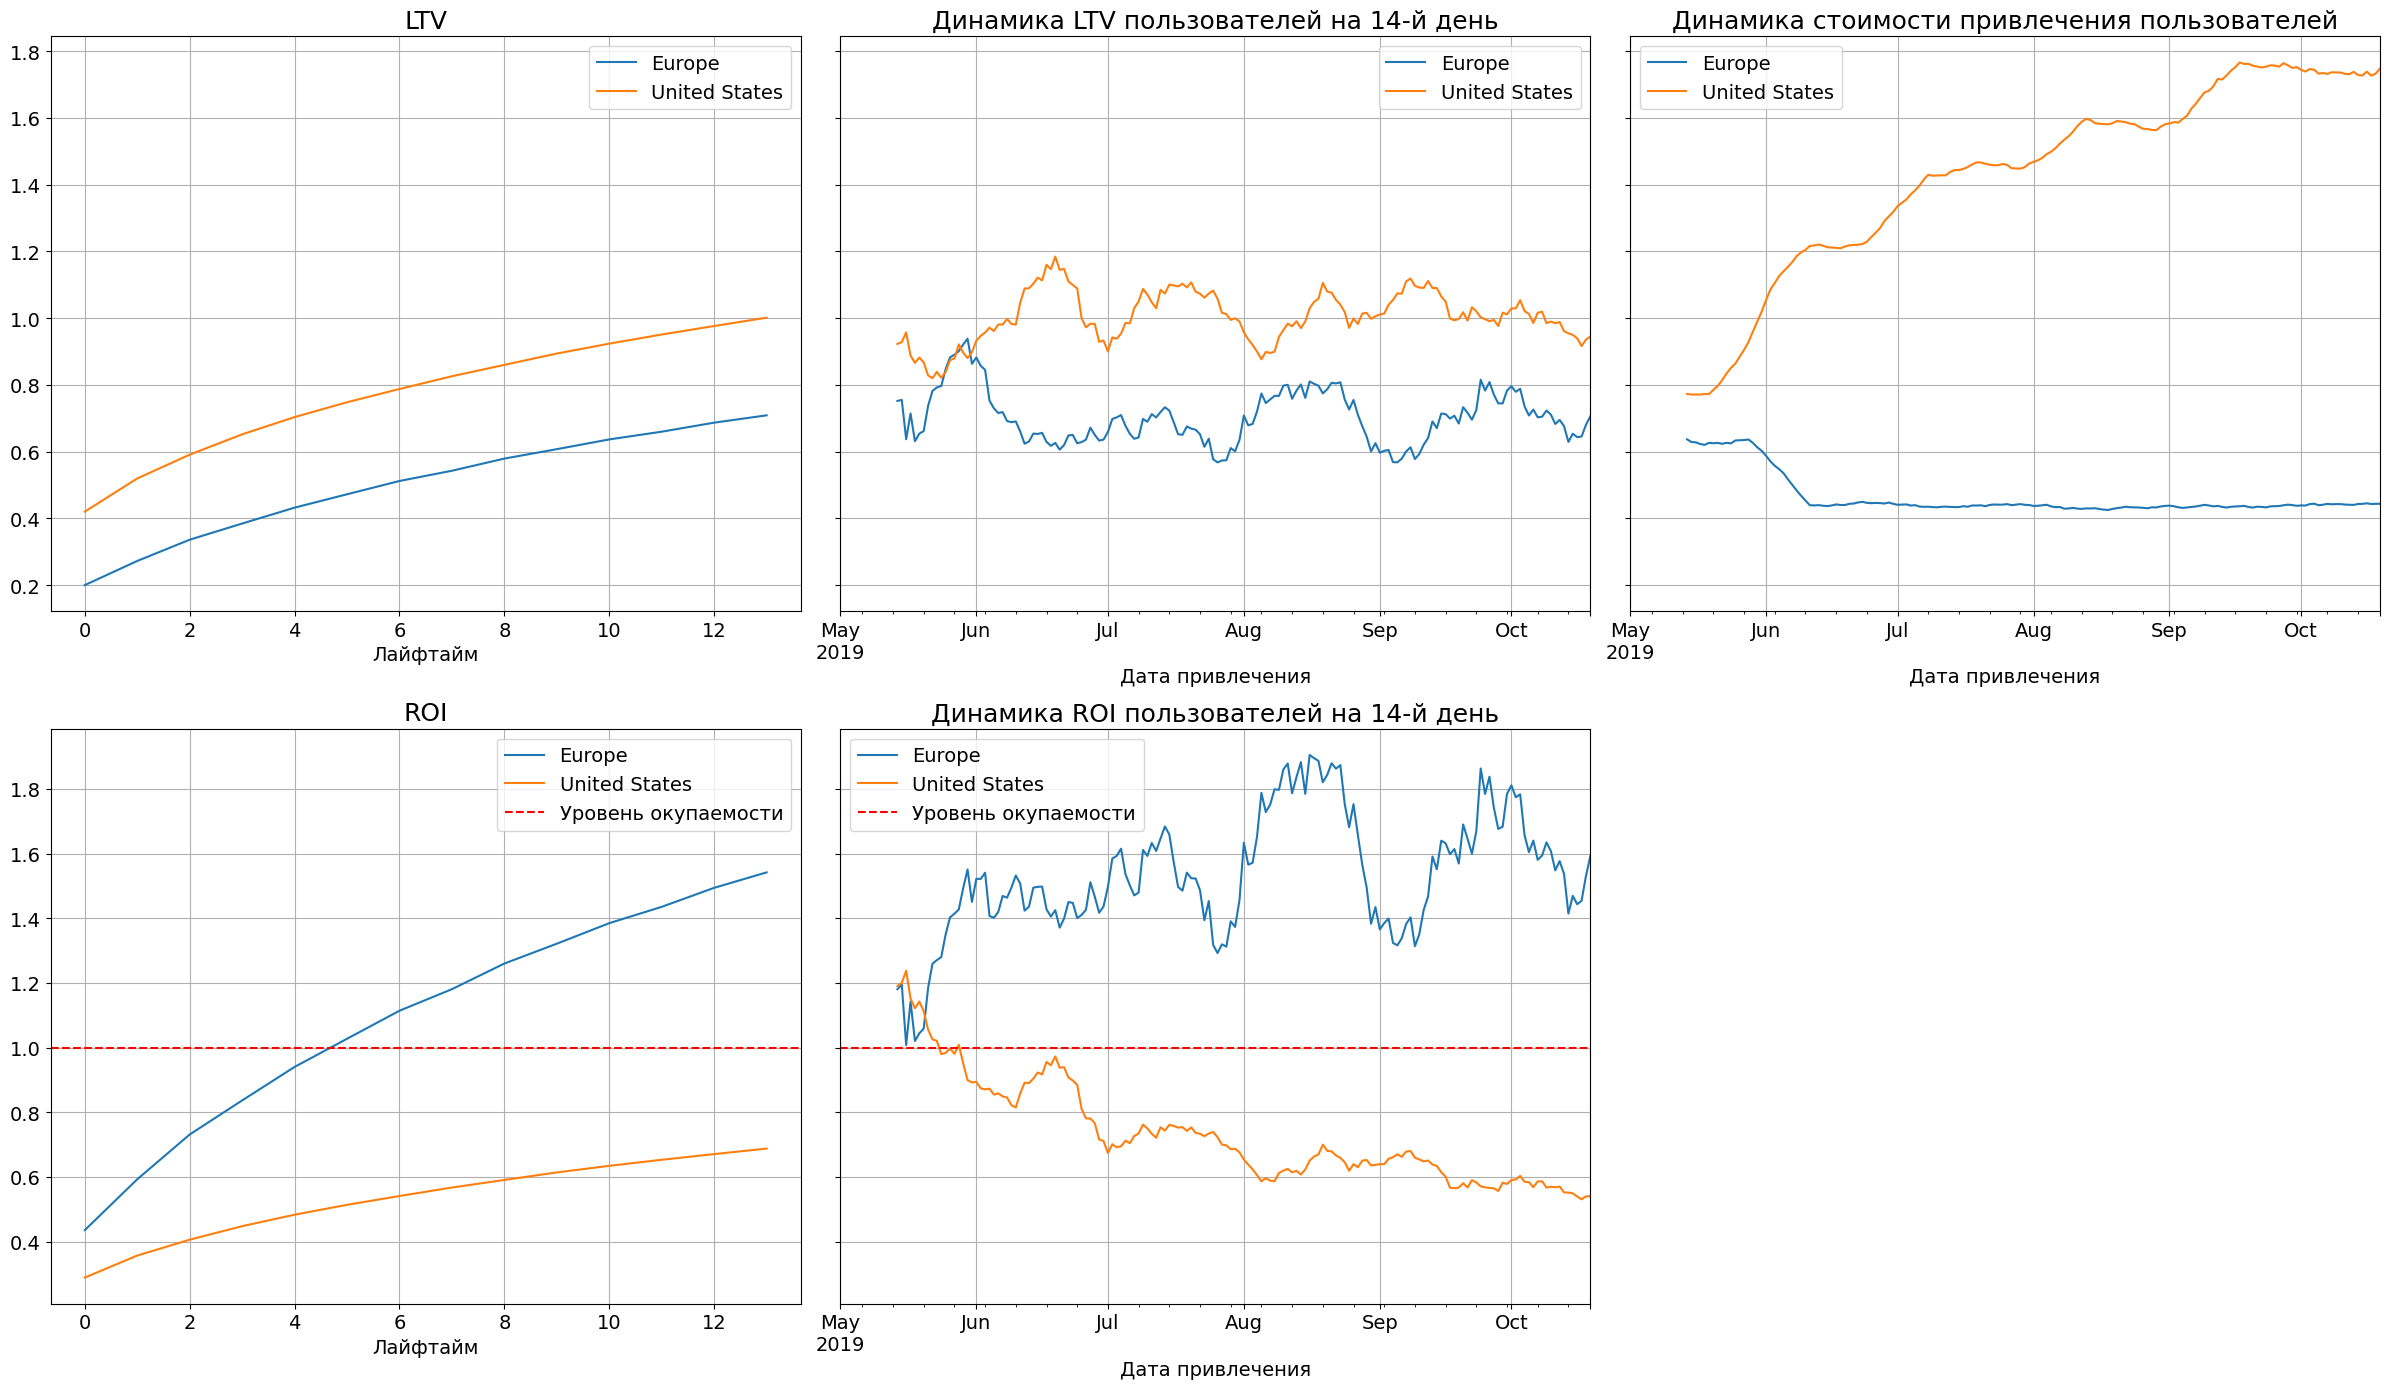

In [51]:
# смотрим окупаемость с разбивкой на США и Европу

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- В приниципе картина не поменялась, пользователи из Европы окупаются, из США нет
- затраты на привлечение пользователей США  намного выше и растут, но ROI 14-го дня падают
- LTV у пользователей США выше
- в динамике LTV у пользователей США и Европы наблюдается сезонность в пределах нормы

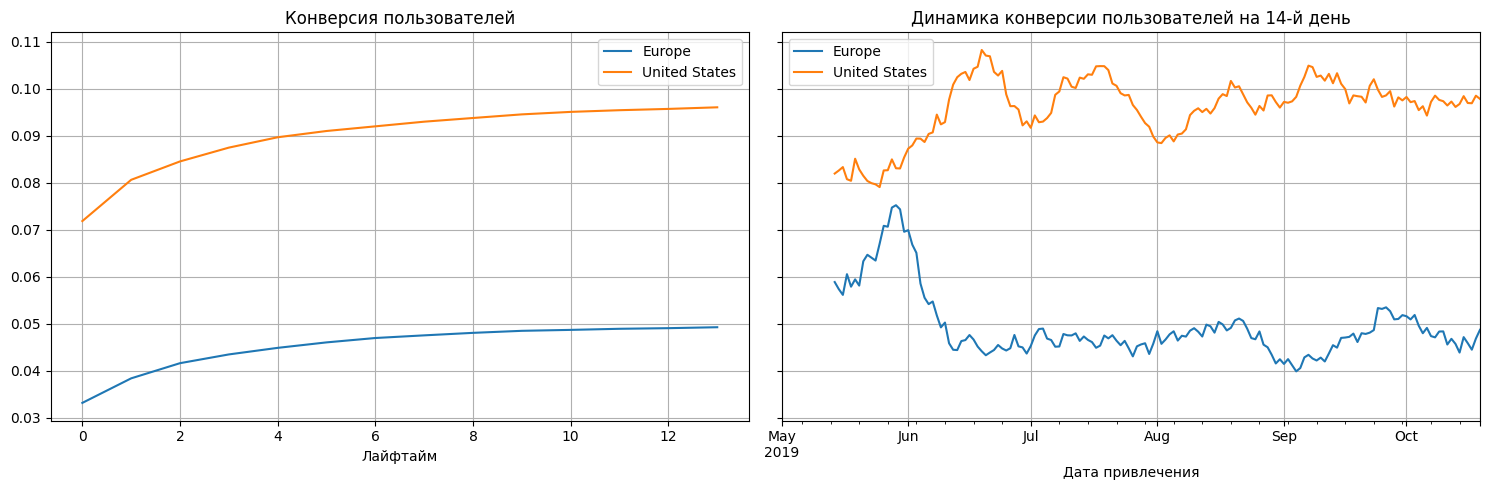

In [52]:
# смотрим на конверсию  с разбивкой на США и Европу

conversion, conversion_grouped, conversion_history = get_conversion(
    profiles_new,
    orders,
    observation_date,
    horizon_days, dimensions=dimensions
    )
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Конверсия у пользователей США в 2 раза выше

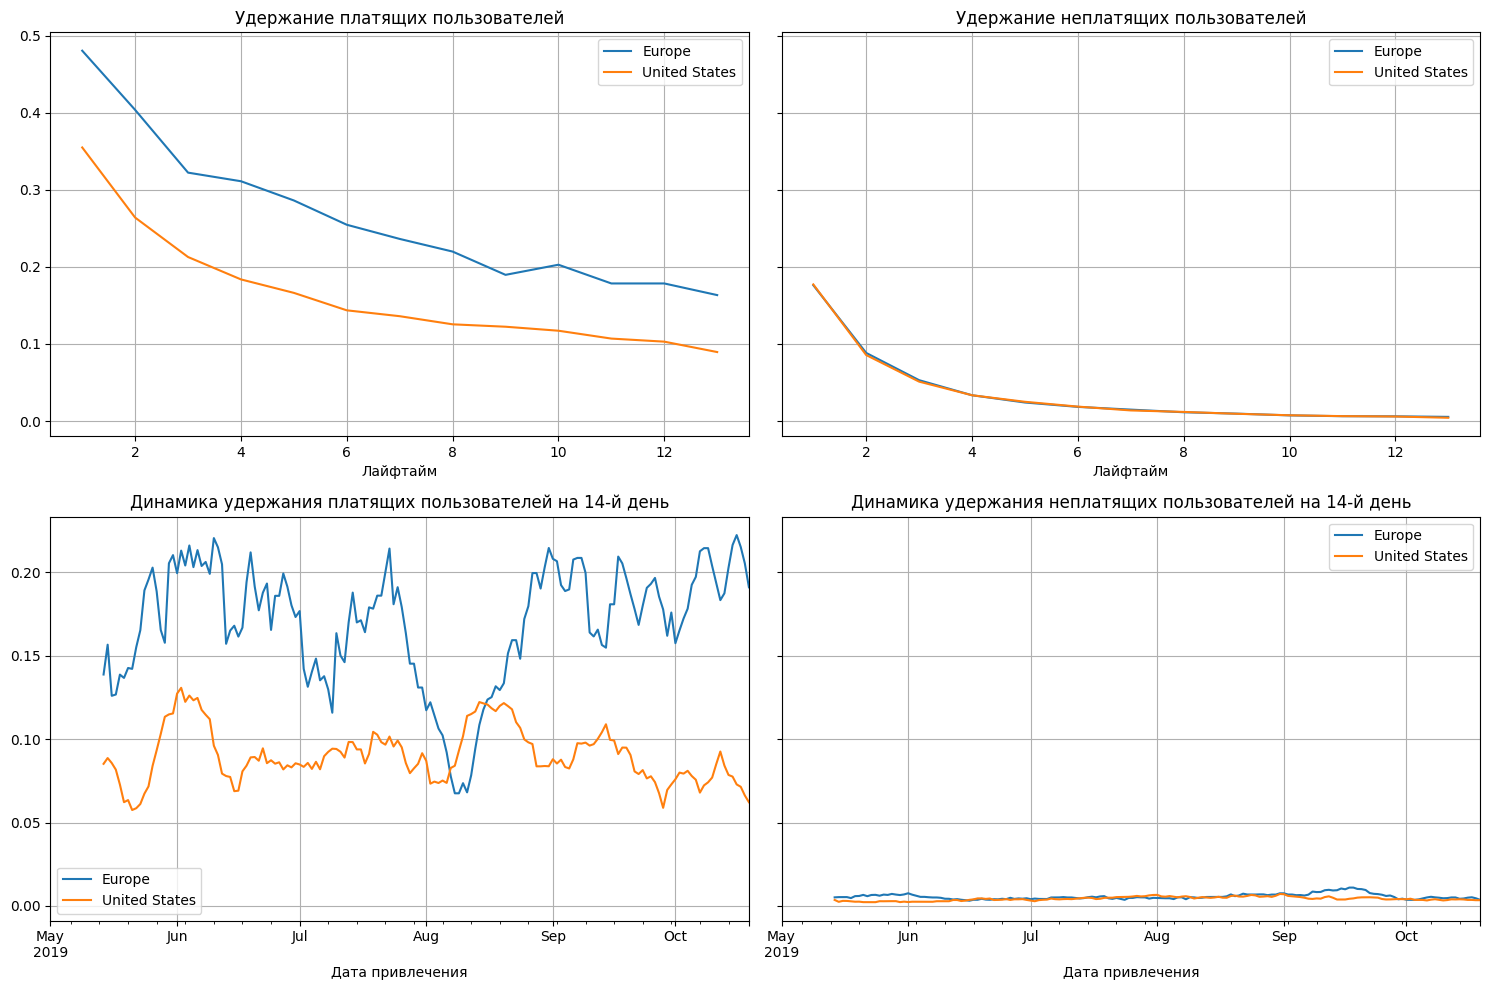

In [53]:
# посмотрим на  удержание пользователей по США и Европе
retention, retention_grouped, retention_history = get_retention(
    profiles_new,
    visits,
    observation_date,
    horizon_days,
     dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)

Удержание у платящих пользователей из США ниже. В динамике у платящих пользователей из Европы виден значительный спад в августе, возможно это связано с отпусками, которые у европейских жителей приходятся на август. 

**Вывод**   
В целом, расходы на маркетинг себя не оправдали.  
Реклама не окупается и с увеличением расходов на рекламу, показатели ROI снижаются.  
У пользователей с типами устройств MAC и iphone, пользователей из США, а также пользователи привлеченные из рекламных каналов TipTop, Faceboom  и  AdNonSense  показатели ROI  ниже уровня окупаемости.  
Так у пользователей из США показатель ROI 14-го дня равен 0.8, в тоже время в Великобритании отмечается хорошая окупаемость в 2 раза.  
Причиной неокупаемости пользователей из США можно объяснить высокими расходами на рекламу, что подтверждается чрезмерными и постоянно растущими показателями САС. Это можно связать с расходами на рекламные каналы TipTop и FaceBoom, которые работают только на американском рынке и на их долю приходится суммарно до 83% от всех затрат на рекламу. Пользователи, пришедшие с данных каналов, также не окупаются. При этом затраты на канал TipTop постоянно  увеличивались и к октябрю уровень САС в 3.5 раз превышал показатели других рекламных каналов.  
Учитывая, что в США максимальное кол-во пользователей с устройствами MAC и iphone, то проблема неокупаемости также объясняется высокими расходами на рекламу, как и для всех пользователей из США.  
Стоит отметить, что у пользователей, пришедших из каналов FaceBoom и AdNonSense лучшие показатели конверсии, но  самые низкие показатели удержания.


## Вывод
<a id="finish"></a>


  
Исходя из проведенного исследования, с июня 2019 г. наблюдаются существенные затраты и перекос маркетингового бюджета по некоторым рекламным каналам. Это привело к удорожанию привлечения и неокупаемости пользователей из США, чья доля превышает пользователей из других стран в 2 раза.    
По показателю ROI неэффективными рекламными каналами являются: TipTop(США), FaceBoom(США) и AdNonSense (Великобритания, Германия, Франция). По каналам FaceBoom, TipTop пришли 29144 и 19561 пользователей, это половина всех пользователей из США. Пользователи, привлеченными данными каналами имеют самые высокие показатели САС и в следствие этого неокупаются.   
При общих расходах на рекламу - 105497, затраты на данные каналы составили:
- TipTop  - 54751 (52%)
- FaceBoom - 32445 (31%)
- AdNonSense - 3911 (4%)

Затраты на канал TipTop возрастали от месяца к месяцу, что привело к увеличению показатей САС с 1.0 до 3.5, среднее значение в итоге составляет 2.8. У каналов FaceBoom данный показатель равен 1.1, у AdNonSense - 1.0



**Рекомендовано:**  
 - пересмотреть стратегию ведения маркетинга 
 - исключить канал привлечения TipTop 
 - выявить причины низких показателей удержания пользователей, пришедших из каналов FaceBoom и AdNonSense и решить вопрос о   необходимости использовать данные каналы для привлечения пользователей
 - сместить фокус на привлечение пользователей из стран Европы
 